In [1]:
!pip install collinearity

  Created wheel for collinearity: filename=collinearity-0.6.1-py3-none-any.whl size=4459 sha256=27ecc707173306fa011ce5d591b738daeaafb1c75b5094ff52e5199843d097ee
  Stored in directory: /root/.cache/pip/wheels/31/bf/74/0a475ad9095545c56fe02d678ccd38739baa81513e877d91ca
Successfully built collinearity


In [2]:
from collinearity import SelectNonCollinear

In [116]:
# Essentials
import numpy as np
import pandas as pd
import itertools
#import random

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing Libraries
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedShuffleSplit
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA

# Machine Learning Libraries
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
import sklearn
from sklearn import svm
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score, log_loss, auc
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.naive_bayes import GaussianNB
from nltk.classify.scikitlearn import SklearnClassifier

# Mapper
from sklearn_pandas import DataFrameMapper
# Oversample
from imblearn.over_sampling import SMOTE

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import io
import os

# allow muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# display more rows and columns
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 999

In [4]:
from google.colab import drive
from pathlib import Path
main_path = '/content/drive/MyDrive/machine_learning/'
# change working directory
#print(os.chdir(main_path))
# get current directory
print(os.getcwd())
os.listdir()


/content


['.config', 'sample_data']

In [5]:
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [6]:
df = pd.read_csv(main_path+'/data.csv')

In [7]:
df_bankrupt = df['Bankrupt?']
df_copy = df.copy()
df_bankrupt.head()
df_copy.head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt?, dtype: int64

Bankrupt?  ...   Equity to Liability
0          1  ...              0.016469
1          1  ...              0.020794
2          1  ...              0.016474
3          1  ...              0.023982
4          1  ...              0.035490

[5 rows x 96 columns]

In [8]:
print(df.shape)
df.head()

(6819, 96)


Bankrupt?  ...   Equity to Liability
0          1  ...              0.016469
1          1  ...              0.020794
2          1  ...              0.016474
3          1  ...              0.023982
4          1  ...              0.035490

[5 rows x 96 columns]

In [9]:
df.info() # no missing value?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [10]:
df.describe()

Bankrupt?  ...   Equity to Liability
count  6819.000000  ...           6819.000000
mean      0.032263  ...              0.047578
std       0.176710  ...              0.050014
min       0.000000  ...              0.000000
25%       0.000000  ...              0.024477
50%       0.000000  ...              0.033798
75%       0.000000  ...              0.052838
max       1.000000  ...              1.000000

[8 rows x 96 columns]

In [11]:
data_percent_missing = df.isnull().sum() * 100 / len(df)
data_missing_value = pd.DataFrame({'column_name': df.columns,'percent_missing': data_percent_missing})
data_missing_value = data_missing_value.sort_values('percent_missing',ascending=False)
data_missing_value['dtypes'] = df.dtypes
data_missing_value = data_missing_value[data_missing_value.percent_missing>0]
print(data_missing_value)

Empty DataFrame
Columns: [column_name, percent_missing, dtypes]
Index: []


0    6599
1     220
Name: Bankrupt?, dtype: int64


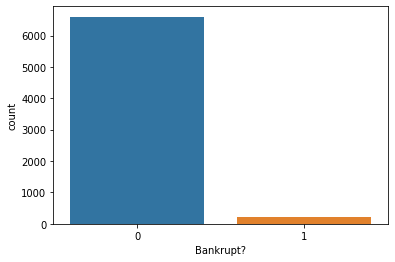

In [12]:
print(df['Bankrupt?'].value_counts())
sns.countplot(x='Bankrupt?', data=df);

Figure 1: Countplot of target variable

In [13]:
df.corr()['Bankrupt?'].sort_values(ascending=False)

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
 Liability to Equity                                        0.166812
 Current Liabilities/Equity                                 0.153828
 Current Liability to Equity                                0.153828
 Liability-Assets Flag                                      0.139212
 Total expense/Assets                                       0.139049
 Equity to Long-term Liability                              0.139014
 Cash/Current Liability                                     0.077921
 Inventory and accounts receivable/Net value                0.075278
 Fixed Assets Turnover Frequency                            0.072818
 Contingent liabilities/Net worth 

Figure 2: Correlation with target variable

Numerical: (6819, 96)


(<Figure size 2736x2736 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9aa8dadd0>)

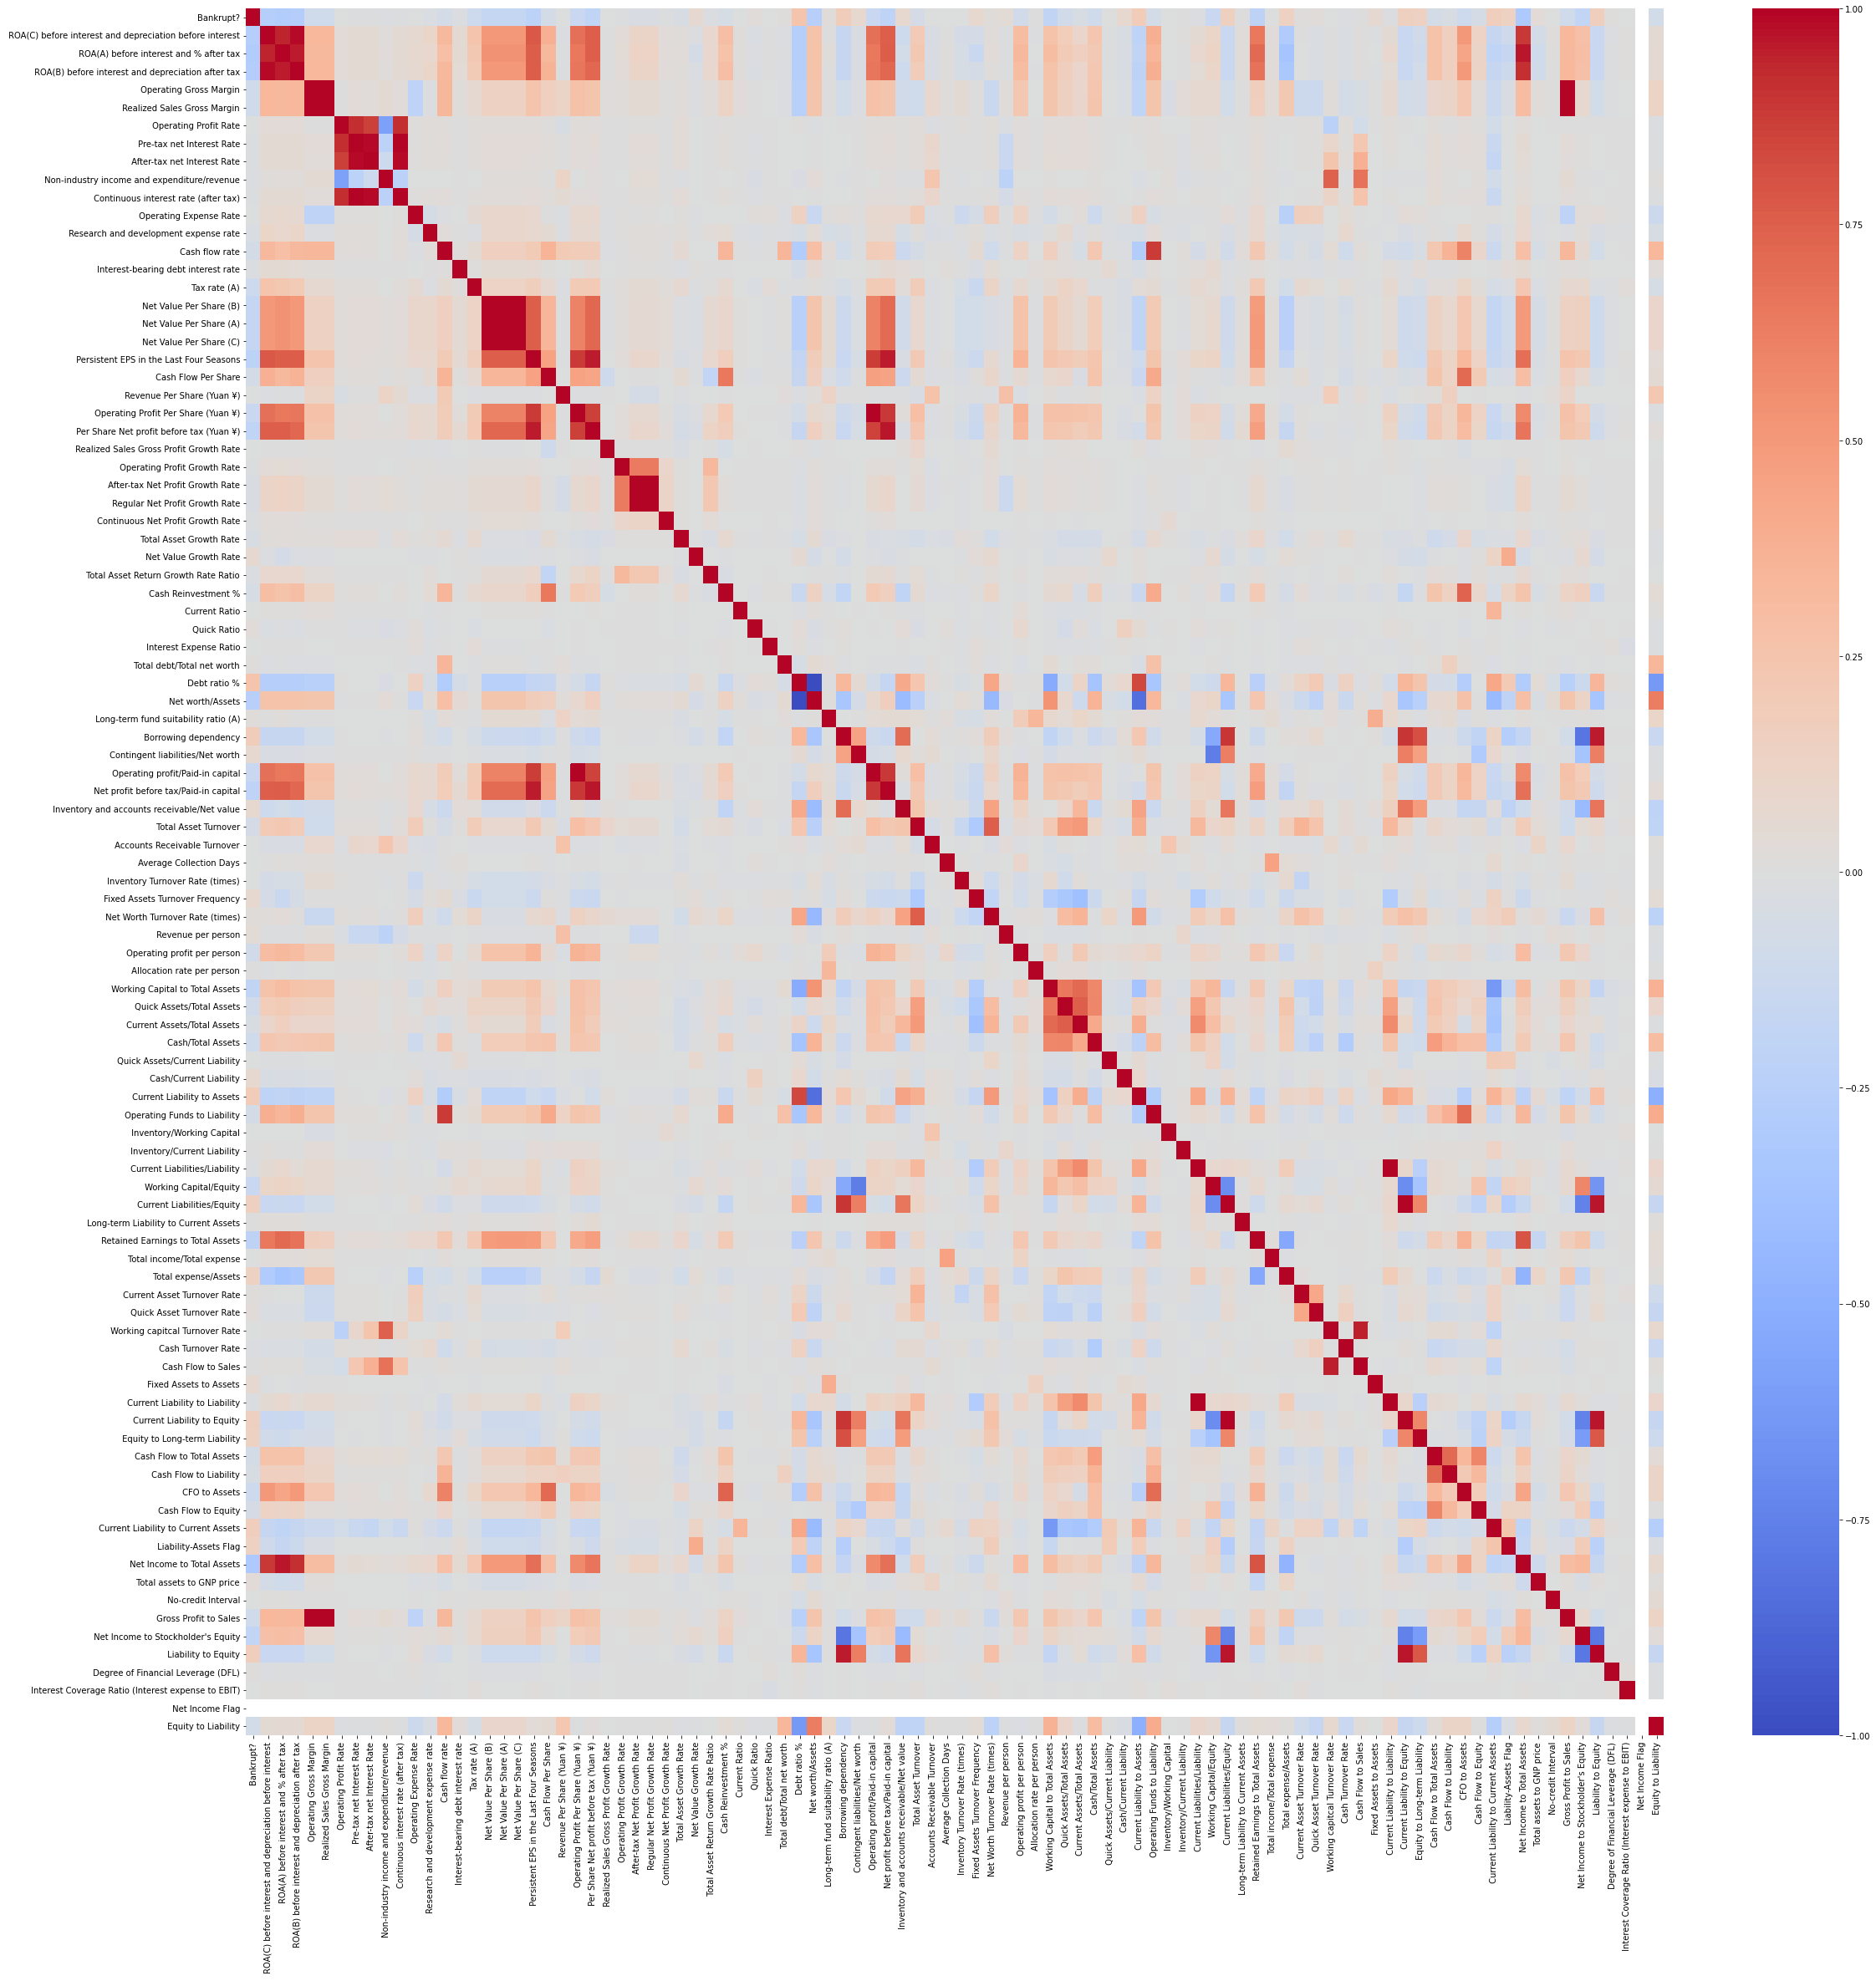

In [14]:
# check collinearity
df_train_num =  df.select_dtypes(include=np.number)
print("Numerical:", df_train_num.shape)
plt.subplots(figsize=(38, 38))
sns.heatmap(df_train_num.corr(), annot =False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g')

Figure 3: Heatmap correlation matrix for collinearity

(0.0, 52.49999999999996)

Text(0.5, 0, 'Bankrupt?')

Text(0, 0.5, 'Bankrupt?')

(0.0, 10.286785876647969)

Text(0.5, 0, ' ROA(C) before interest and depreciation before interest')

Text(0, 0.5, 'Bankrupt?')

(0.0, 11.44001426190167)

Text(0.5, 0, ' ROA(A) before interest and % after tax')

Text(0, 0.5, 'Bankrupt?')

(0.0, 11.217608728595232)

Text(0.5, 0, ' ROA(B) before interest and depreciation after tax')

Text(0, 0.5, 'Bankrupt?')

(0.0, 60.63143720584567)

Text(0.5, 0, ' Operating Gross Margin')

Text(0, 0.5, 'Bankrupt?')

(0.0, 59.11565127569953)

Text(0.5, 0, ' Realized Sales Gross Margin')

Text(0, 0.5, 'Bankrupt?')

(0.0, 2559.356676183361)

Text(0.5, 0, ' Operating Profit Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 888.7409516868166)

Text(0.5, 0, ' Pre-tax net Interest Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 822.867087060867)

Text(0.5, 0, ' After-tax net Interest Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 627.9337458090101)

Text(0.5, 0, ' Non-industry income and expenditure/revenue')

Text(0, 0.5, 'Bankrupt?')

(0.0, 982.4080182746294)

Text(0.5, 0, ' Continuous interest rate (after tax)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Operating Expense Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Research and development expense rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 120.9648944805199)

Text(0.5, 0, ' Cash flow rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1.2098308668076108e-07)

Text(0.5, 0, ' Interest-bearing debt interest rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 19.29365055311411)

Text(0.5, 0, ' Tax rate (A)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 23.638872763266193)

Text(0.5, 0, ' Net Value Per Share (B)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 23.638872763266193)

Text(0.5, 0, ' Net Value Per Share (A)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 27.77087084790204)

Text(0.5, 0, ' Net Value Per Share (C)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 24.10331547401718)

Text(0.5, 0, ' Persistent EPS in the Last Four Seasons')

Text(0, 0.5, 'Bankrupt?')

(0.0, 72.49354988564909)

Text(0.5, 0, ' Cash Flow Per Share')

Text(0, 0.5, 'Bankrupt?')

(0.0, 31.800695619504125)

Text(0.5, 0, ' Revenue Per Share (Yuan ¥)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 40.367876141325716)

Text(0.5, 0, ' Operating Profit Per Share (Yuan ¥)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 25.28453704754437)

Text(0.5, 0, ' Per Share Net profit before tax (Yuan ¥)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 794.6507675208318)

Text(0.5, 0, ' Realized Sales Gross Profit Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 430.43466662109705)

Text(0.5, 0, ' Operating Profit Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 235.88384508891284)

Text(0.5, 0, ' After-tax Net Profit Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 166.00080774078765)

Text(0.5, 0, ' Regular Net Profit Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 866.754410591733)

Text(0.5, 0, ' Continuous Net Profit Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Total Asset Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1.2224976398628745e-07)

Text(0.5, 0, ' Net Value Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 650.3368716576879)

Text(0.5, 0, ' Total Asset Return Growth Rate Ratio')

Text(0, 0.5, 'Bankrupt?')

(0.0, 44.12466983639061)

Text(0.5, 0, ' Cash Reinvestment %')

Text(0, 0.5, 'Bankrupt?')

(0.0, 133.25758895690984)

Text(0.5, 0, ' Current Ratio')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Quick Ratio')

Text(0, 0.5, 'Bankrupt?')

(0.0, 160.83422904699677)

Text(0.5, 0, ' Interest Expense Ratio')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1.5060911710770022e-08)

Text(0.5, 0, ' Total debt/Total net worth')

Text(0, 0.5, 'Bankrupt?')

(0.0, 12.142953641238549)

Text(0.5, 0, ' Debt ratio %')

Text(0, 0.5, 'Bankrupt?')

(0.0, 12.142953641238492)

Text(0.5, 0, ' Net worth/Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 81.08501254188234)

Text(0.5, 0, ' Long-term fund suitability ratio (A)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 118.24461454163)

Text(0.5, 0, ' Borrowing dependency')

Text(0, 0.5, 'Bankrupt?')

(0.0, 973.5123127859379)

Text(0.5, 0, ' Contingent liabilities/Net worth')

Text(0, 0.5, 'Bankrupt?')

(0.0, 37.73641762604199)

Text(0.5, 0, ' Operating profit/Paid-in capital')

Text(0, 0.5, 'Bankrupt?')

(0.0, 26.43313584988755)

Text(0.5, 0, ' Net profit before tax/Paid-in capital')

Text(0, 0.5, 'Bankrupt?')

(0.0, 84.53881493903849)

Text(0.5, 0, ' Inventory and accounts receivable/Net value')

Text(0, 0.5, 'Bankrupt?')

(0.0, 8.91354545454546)

Text(0.5, 0, ' Total Asset Turnover')

Text(0, 0.5, 'Bankrupt?')

(0.0, 4.283718330850049e-08)

Text(0.5, 0, ' Accounts Receivable Turnover')

Text(0, 0.5, 'Bankrupt?')

(0.0, 3.8146980756497863e-07)

Text(0.5, 0, ' Average Collection Days')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Inventory Turnover Rate (times)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Fixed Assets Turnover Frequency')

Text(0, 0.5, 'Bankrupt?')

(0.0, 30.18272727272723)

Text(0.5, 0, ' Net Worth Turnover Rate (times)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1.8732937708408395e-08)

Text(0.5, 0, ' Revenue per person')

Text(0, 0.5, 'Bankrupt?')

(0.0, 52.57156194378182)

Text(0.5, 0, ' Operating profit per person')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1.5017633228840127e-08)

Text(0.5, 0, ' Allocation rate per person')

Text(0, 0.5, 'Bankrupt?')

(0.0, 7.576264891690021)

Text(0.5, 0, ' Working Capital to Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 2.184762674131061)

Text(0.5, 0, ' Quick Assets/Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1.8088195181088054)

Text(0.5, 0, ' Current Assets/Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 25.63325908642265)

Text(0.5, 0, ' Cash/Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 157.19713106376622)

Text(0.5, 0, ' Quick Assets/Current Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Cash/Current Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 9.466017122995527)

Text(0.5, 0, ' Current Liability to Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 43.49674116980162)

Text(0.5, 0, ' Operating Funds to Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 343.617405574133)

Text(0.5, 0, ' Inventory/Working Capital')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Inventory/Current Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 5.938172450371269)

Text(0.5, 0, ' Current Liabilities/Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 108.80607593957842)

Text(0.5, 0, ' Working Capital/Equity')

Text(0, 0.5, 'Bankrupt?')

(0.0, 160.34732355173645)

Text(0.5, 0, ' Current Liabilities/Equity')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Long-term Liability to Current Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 37.14091245209042)

Text(0.5, 0, ' Retained Earnings to Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 4046.828392528158)

Text(0.5, 0, ' Total income/Total expense')

Text(0, 0.5, 'Bankrupt?')

(0.0, 31.1099394279351)

Text(0.5, 0, ' Total expense/Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Current Asset Turnover Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Quick Asset Turnover Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1352.0234365728438)

Text(0.5, 0, ' Working capitcal Turnover Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Cash Turnover Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 38883.512991169184)

Text(0.5, 0, ' Cash Flow to Sales')

Text(0, 0.5, 'Bankrupt?')

(0.0, 3.217589485743754)

Text(0.5, 0, ' Fixed Assets to Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 5.938172450371269)

Text(0.5, 0, ' Current Liability to Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 160.34732355173645)

Text(0.5, 0, ' Current Liability to Equity')

Text(0, 0.5, 'Bankrupt?')

(0.0, 97.70098617251905)

Text(0.5, 0, ' Equity to Long-term Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 36.833285761806124)

Text(0.5, 0, ' Cash Flow to Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 100.3918192477624)

Text(0.5, 0, ' Cash Flow to Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 10.812397794766909)

Text(0.5, 0, ' CFO to Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 94.56578255572956)

Text(0.5, 0, ' Cash Flow to Equity')

Text(0, 0.5, 'Bankrupt?')

(0.0, 27.41263634096526)

Text(0.5, 0, ' Current Liability to Current Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 128.28374939958357)

Text(0.5, 0, ' Liability-Assets Flag')

Text(0, 0.5, 'Bankrupt?')

(0.0, 18.9363360641386)

Text(0.5, 0, ' Net Income to Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1e-12)

Text(0.5, 0, ' Total assets to GNP price')

Text(0, 0.5, 'Bankrupt?')

(0.0, 378.12115050576483)

Text(0.5, 0, ' No-credit Interval')

Text(0, 0.5, 'Bankrupt?')

(0.0, 60.632603511695734)

Text(0.5, 0, ' Gross Profit to Sales')

Text(0, 0.5, 'Bankrupt?')

(0.0, 223.69695588458234)

Text(0.5, 0, " Net Income to Stockholder's Equity")

Text(0, 0.5, 'Bankrupt?')

(0.0, 138.46415138943863)

Text(0.5, 0, ' Liability to Equity')

Text(0, 0.5, 'Bankrupt?')

(0.0, 190.85697417360217)

Text(0.5, 0, ' Degree of Financial Leverage (DFL)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 306.8123238053698)

Text(0.5, 0, ' Interest Coverage Ratio (Interest expense to EBIT)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 52.49999999999996)

Text(0.5, 0, ' Net Income Flag')

Text(0, 0.5, 'Bankrupt?')

(0.0, 39.36327603696296)

Text(0.5, 0, ' Equity to Liability')

Text(0, 0.5, 'Bankrupt?')

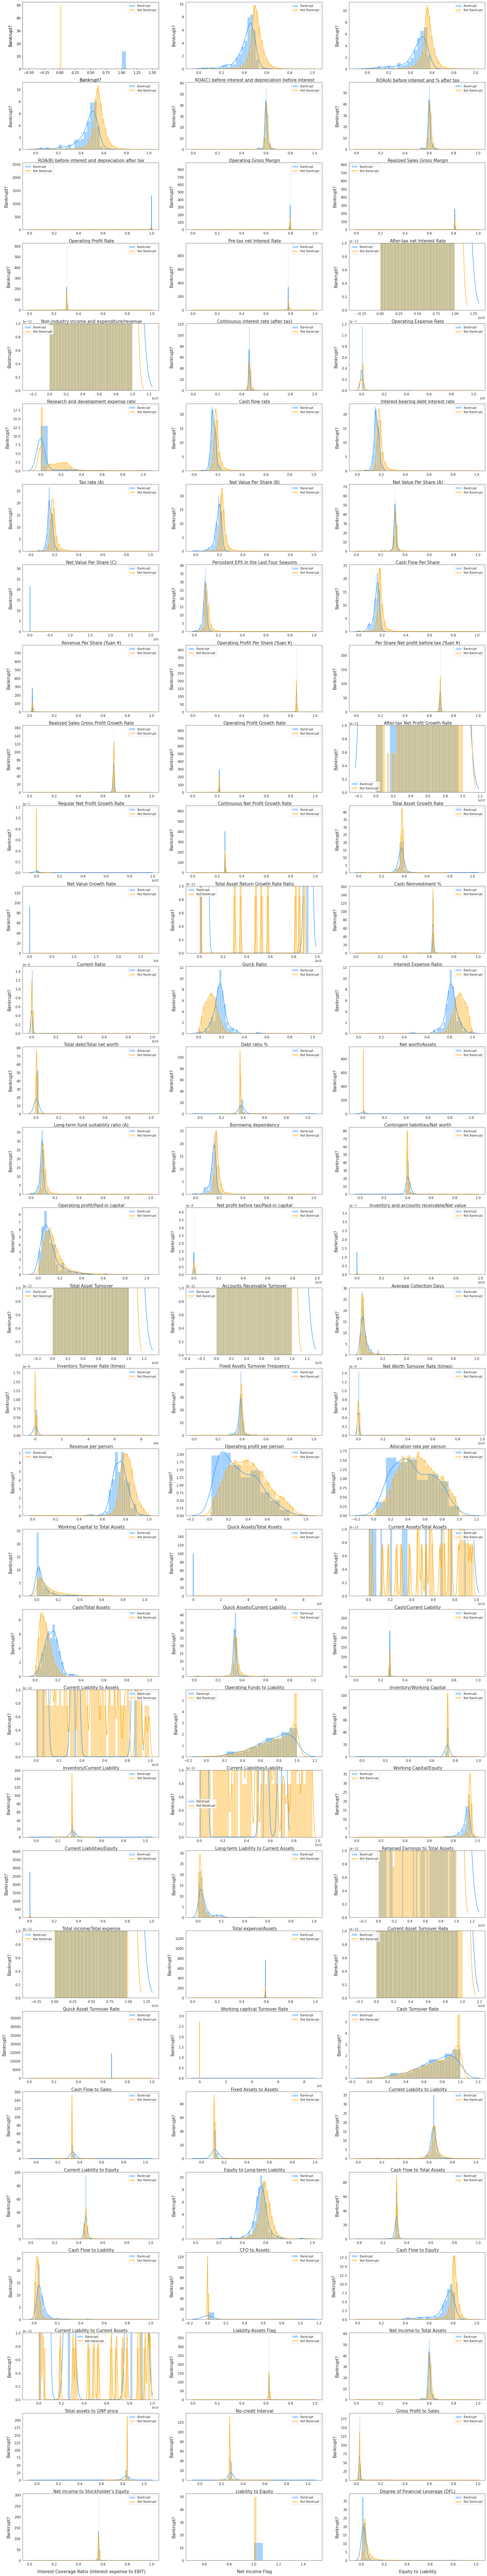

In [15]:

fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 200))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, col in enumerate(list(df), 1):
  plt.subplot(len(list(df)), 3, i)
  sns.set_style("white")
  x1 = df.loc[df['Bankrupt?']==1,[col]]
  x2 = df.loc[df['Bankrupt?']==0,[col]]
  # Plot
  #kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
  #plt.figure(figsize=(10,7), dpi= 80)
  sns.distplot(x1, color="dodgerblue", label="Bankrupt")
  sns.distplot(x2, color="orange", label="Not Bankrupt")
  plt.ylim(0,None) 
  plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
  plt.ylabel('Bankrupt?', size=15, labelpad=12.5)

  for j in range(2):
      plt.tick_params(axis='x', labelsize=12)
      plt.tick_params(axis='y', labelsize=12)
#plt.xlabel(col)
  plt.legend(loc='best', prop={'size': 10})
        
plt.show()


Figure 4: Distribution plot, split by target variable Y=0 and Y=1

In [16]:
pd.Series(index=['min','max'],data=[df.min(),df.max()]) # double check min, max

min                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Bankrupt?                                                   0.0
 ROA(C) before interest and depreciation before interest    0.0
 

Figure 5: Transform and scale skewed variables

In [17]:
#  log and max-min transform Independent Variabe
def data_trans(df):
    
    for col in df:
        skew = df[col].skew()
        max = df[col].max()
        if ((skew > 0.5 or skew < -0.5) and max >1):
            print(col)
            df[col] = np.log1p(df[col])
            df[col] = (df[col]-(df[col]).min())/((df[col]).max()-(df[col]).min())
        else:
            continue
            
    return df

df_norm = data_trans(df)


 Operating Expense Rate
 Research and development expense rate
 Interest-bearing debt interest rate
 Revenue Per Share (Yuan ¥)
 Total Asset Growth Rate
 Net Value Growth Rate
 Current Ratio
 Quick Ratio
 Total debt/Total net worth
 Accounts Receivable Turnover
 Average Collection Days
 Inventory Turnover Rate (times)
 Fixed Assets Turnover Frequency
 Revenue per person
 Allocation rate per person
 Quick Assets/Current Liability
 Cash/Current Liability
 Inventory/Current Liability
 Long-term Liability to Current Assets
 Current Asset Turnover Rate
 Quick Asset Turnover Rate
 Cash Turnover Rate
 Fixed Assets to Assets
 Total assets to GNP price


In [18]:
df_norm.describe()

Bankrupt?  ...   Equity to Liability
count  6819.000000  ...           6819.000000
mean      0.032263  ...              0.047578
std       0.176710  ...              0.050014
min       0.000000  ...              0.000000
25%       0.000000  ...              0.024477
50%       0.000000  ...              0.033798
75%       0.000000  ...              0.052838
max       1.000000  ...              1.000000

[8 rows x 96 columns]

Figure 6: Display max-min scaling

(0.0, 52.49999999999996)

Text(0.5, 0, 'Bankrupt?')

Text(0, 0.5, 'Bankrupt?')

(0.0, 10.286785876647969)

Text(0.5, 0, ' ROA(C) before interest and depreciation before interest')

Text(0, 0.5, 'Bankrupt?')

(0.0, 11.44001426190167)

Text(0.5, 0, ' ROA(A) before interest and % after tax')

Text(0, 0.5, 'Bankrupt?')

(0.0, 11.217608728595232)

Text(0.5, 0, ' ROA(B) before interest and depreciation after tax')

Text(0, 0.5, 'Bankrupt?')

(0.0, 60.63143720584567)

Text(0.5, 0, ' Operating Gross Margin')

Text(0, 0.5, 'Bankrupt?')

(0.0, 59.11565127569953)

Text(0.5, 0, ' Realized Sales Gross Margin')

Text(0, 0.5, 'Bankrupt?')

(0.0, 2559.356676183361)

Text(0.5, 0, ' Operating Profit Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 888.7409516868166)

Text(0.5, 0, ' Pre-tax net Interest Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 822.867087060867)

Text(0.5, 0, ' After-tax net Interest Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 627.9337458090101)

Text(0.5, 0, ' Non-industry income and expenditure/revenue')

Text(0, 0.5, 'Bankrupt?')

(0.0, 982.4080182746294)

Text(0.5, 0, ' Continuous interest rate (after tax)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 6.975602363994544)

Text(0.5, 0, ' Operating Expense Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 4.615926655553873)

Text(0.5, 0, ' Research and development expense rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 120.9648944805199)

Text(0.5, 0, ' Cash flow rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 54.20503691527692)

Text(0.5, 0, ' Interest-bearing debt interest rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 19.29365055311411)

Text(0.5, 0, ' Tax rate (A)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 23.638872763266193)

Text(0.5, 0, ' Net Value Per Share (B)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 23.638872763266193)

Text(0.5, 0, ' Net Value Per Share (A)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 27.77087084790204)

Text(0.5, 0, ' Net Value Per Share (C)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 24.10331547401718)

Text(0.5, 0, ' Persistent EPS in the Last Four Seasons')

Text(0, 0.5, 'Bankrupt?')

(0.0, 72.49354988564909)

Text(0.5, 0, ' Cash Flow Per Share')

Text(0, 0.5, 'Bankrupt?')

(0.0, 677.9625404891425)

Text(0.5, 0, ' Revenue Per Share (Yuan ¥)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 40.367876141325716)

Text(0.5, 0, ' Operating Profit Per Share (Yuan ¥)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 25.28453704754437)

Text(0.5, 0, ' Per Share Net profit before tax (Yuan ¥)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 794.6507675208318)

Text(0.5, 0, ' Realized Sales Gross Profit Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 430.43466662109705)

Text(0.5, 0, ' Operating Profit Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 235.88384508891284)

Text(0.5, 0, ' After-tax Net Profit Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 166.00080774078765)

Text(0.5, 0, ' Regular Net Profit Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 866.754410591733)

Text(0.5, 0, ' Continuous Net Profit Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 28.258827095014375)

Text(0.5, 0, ' Total Asset Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 179.1974015356601)

Text(0.5, 0, ' Net Value Growth Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 650.3368716576879)

Text(0.5, 0, ' Total Asset Return Growth Rate Ratio')

Text(0, 0.5, 'Bankrupt?')

(0.0, 44.12466983639061)

Text(0.5, 0, ' Cash Reinvestment %')

Text(0, 0.5, 'Bankrupt?')

(0.0, 2796.1274443378616)

Text(0.5, 0, ' Current Ratio')

Text(0, 0.5, 'Bankrupt?')

(0.0, 65.11168938377206)

Text(0.5, 0, ' Quick Ratio')

Text(0, 0.5, 'Bankrupt?')

(0.0, 160.83422904699677)

Text(0.5, 0, ' Interest Expense Ratio')

Text(0, 0.5, 'Bankrupt?')

(0.0, 79.12248959016969)

Text(0.5, 0, ' Total debt/Total net worth')

Text(0, 0.5, 'Bankrupt?')

(0.0, 12.142953641238549)

Text(0.5, 0, ' Debt ratio %')

Text(0, 0.5, 'Bankrupt?')

(0.0, 12.142953641238492)

Text(0.5, 0, ' Net worth/Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 81.08501254188234)

Text(0.5, 0, ' Long-term fund suitability ratio (A)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 118.24461454163)

Text(0.5, 0, ' Borrowing dependency')

Text(0, 0.5, 'Bankrupt?')

(0.0, 973.5123127859379)

Text(0.5, 0, ' Contingent liabilities/Net worth')

Text(0, 0.5, 'Bankrupt?')

(0.0, 37.73641762604199)

Text(0.5, 0, ' Operating profit/Paid-in capital')

Text(0, 0.5, 'Bankrupt?')

(0.0, 26.43313584988755)

Text(0.5, 0, ' Net profit before tax/Paid-in capital')

Text(0, 0.5, 'Bankrupt?')

(0.0, 84.53881493903849)

Text(0.5, 0, ' Inventory and accounts receivable/Net value')

Text(0, 0.5, 'Bankrupt?')

(0.0, 8.91354545454546)

Text(0.5, 0, ' Total Asset Turnover')

Text(0, 0.5, 'Bankrupt?')

(0.0, 57.45092326528909)

Text(0.5, 0, ' Accounts Receivable Turnover')

Text(0, 0.5, 'Bankrupt?')

(0.0, 63.860084680317804)

Text(0.5, 0, ' Average Collection Days')

Text(0, 0.5, 'Bankrupt?')

(0.0, 6.000227307167753)

Text(0.5, 0, ' Inventory Turnover Rate (times)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 43.37475375056827)

Text(0.5, 0, ' Fixed Assets Turnover Frequency')

Text(0, 0.5, 'Bankrupt?')

(0.0, 30.18272727272723)

Text(0.5, 0, ' Net Worth Turnover Rate (times)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 101.92089304577277)

Text(0.5, 0, ' Revenue per person')

Text(0, 0.5, 'Bankrupt?')

(0.0, 52.57156194378182)

Text(0.5, 0, ' Operating profit per person')

Text(0, 0.5, 'Bankrupt?')

(0.0, 61.00038347491807)

Text(0.5, 0, ' Allocation rate per person')

Text(0, 0.5, 'Bankrupt?')

(0.0, 7.576264891690021)

Text(0.5, 0, ' Working Capital to Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 2.184762674131061)

Text(0.5, 0, ' Quick Assets/Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1.8088195181088054)

Text(0.5, 0, ' Current Assets/Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 25.63325908642265)

Text(0.5, 0, ' Cash/Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 3577.4880557642664)

Text(0.5, 0, ' Quick Assets/Current Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 52.229504470374295)

Text(0.5, 0, ' Cash/Current Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 9.466017122995527)

Text(0.5, 0, ' Current Liability to Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 43.49674116980162)

Text(0.5, 0, ' Operating Funds to Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 343.617405574133)

Text(0.5, 0, ' Inventory/Working Capital')

Text(0, 0.5, 'Bankrupt?')

(0.0, 52.05532642489921)

Text(0.5, 0, ' Inventory/Current Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 5.938172450371269)

Text(0.5, 0, ' Current Liabilities/Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 108.80607593957842)

Text(0.5, 0, ' Working Capital/Equity')

Text(0, 0.5, 'Bankrupt?')

(0.0, 160.34732355173645)

Text(0.5, 0, ' Current Liabilities/Equity')

Text(0, 0.5, 'Bankrupt?')

(0.0, 52.49128430880509)

Text(0.5, 0, ' Long-term Liability to Current Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 37.14091245209042)

Text(0.5, 0, ' Retained Earnings to Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 4046.828392528158)

Text(0.5, 0, ' Total income/Total expense')

Text(0, 0.5, 'Bankrupt?')

(0.0, 31.1099394279351)

Text(0.5, 0, ' Total expense/Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 43.09630247007122)

Text(0.5, 0, ' Current Asset Turnover Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 6.862660510853095)

Text(0.5, 0, ' Quick Asset Turnover Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 1352.0234365728438)

Text(0.5, 0, ' Working capitcal Turnover Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 6.798153116000368)

Text(0.5, 0, ' Cash Turnover Rate')

Text(0, 0.5, 'Bankrupt?')

(0.0, 38883.512991169184)

Text(0.5, 0, ' Cash Flow to Sales')

Text(0, 0.5, 'Bankrupt?')

(0.0, 76.2524758697267)

Text(0.5, 0, ' Fixed Assets to Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 5.938172450371269)

Text(0.5, 0, ' Current Liability to Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 160.34732355173645)

Text(0.5, 0, ' Current Liability to Equity')

Text(0, 0.5, 'Bankrupt?')

(0.0, 97.70098617251905)

Text(0.5, 0, ' Equity to Long-term Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 36.833285761806124)

Text(0.5, 0, ' Cash Flow to Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 100.3918192477624)

Text(0.5, 0, ' Cash Flow to Liability')

Text(0, 0.5, 'Bankrupt?')

(0.0, 10.812397794766909)

Text(0.5, 0, ' CFO to Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 94.56578255572956)

Text(0.5, 0, ' Cash Flow to Equity')

Text(0, 0.5, 'Bankrupt?')

(0.0, 27.41263634096526)

Text(0.5, 0, ' Current Liability to Current Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 128.28374939958357)

Text(0.5, 0, ' Liability-Assets Flag')

Text(0, 0.5, 'Bankrupt?')

(0.0, 18.9363360641386)

Text(0.5, 0, ' Net Income to Total Assets')

Text(0, 0.5, 'Bankrupt?')

(0.0, 52.35679648431581)

Text(0.5, 0, ' Total assets to GNP price')

Text(0, 0.5, 'Bankrupt?')

(0.0, 378.12115050576483)

Text(0.5, 0, ' No-credit Interval')

Text(0, 0.5, 'Bankrupt?')

(0.0, 60.632603511695734)

Text(0.5, 0, ' Gross Profit to Sales')

Text(0, 0.5, 'Bankrupt?')

(0.0, 223.69695588458234)

Text(0.5, 0, " Net Income to Stockholder's Equity")

Text(0, 0.5, 'Bankrupt?')

(0.0, 138.46415138943863)

Text(0.5, 0, ' Liability to Equity')

Text(0, 0.5, 'Bankrupt?')

(0.0, 190.85697417360217)

Text(0.5, 0, ' Degree of Financial Leverage (DFL)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 306.8123238053698)

Text(0.5, 0, ' Interest Coverage Ratio (Interest expense to EBIT)')

Text(0, 0.5, 'Bankrupt?')

(0.0, 52.49999999999996)

Text(0.5, 0, ' Net Income Flag')

Text(0, 0.5, 'Bankrupt?')

(0.0, 39.36327603696296)

Text(0.5, 0, ' Equity to Liability')

Text(0, 0.5, 'Bankrupt?')

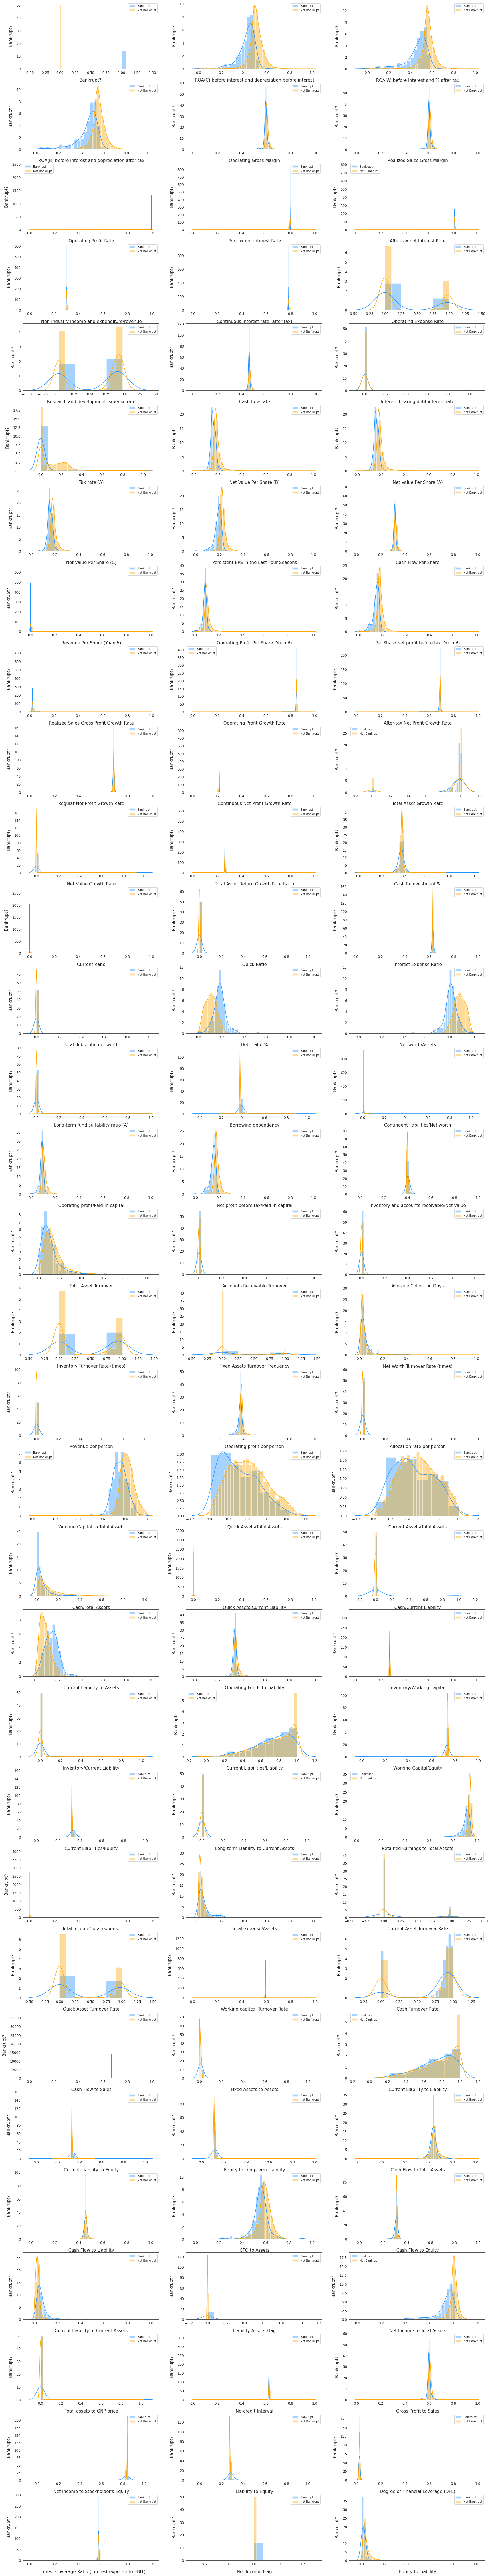

In [19]:

fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 200))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, col in enumerate(list(df_norm), 1):
  plt.subplot(len(list(df_norm)), 3, i)
  sns.set_style("white")
  x1 = df_norm.loc[df_norm['Bankrupt?']==1,[col]]
  x2 = df_norm.loc[df_norm['Bankrupt?']==0,[col]]
  # Plot
  #kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
  #plt.figure(figsize=(10,7), dpi= 80)
  sns.distplot(x1, color="dodgerblue", label="Bankrupt")
  sns.distplot(x2, color="orange", label="Not Bankrupt")
  plt.ylim(0,None) 
  plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
  plt.ylabel('Bankrupt?', size=15, labelpad=12.5)

  for j in range(2):
      plt.tick_params(axis='x', labelsize=12)
      plt.tick_params(axis='y', labelsize=12)
#plt.xlabel(col)
  plt.legend(loc='best', prop={'size': 10})
        
plt.show()


Figure 7: Distribution plot after log1p transformation and max-min scaling

In [20]:
X = df_norm.drop(['Bankrupt?'], axis=1)
y = df_norm[['Bankrupt?']]
print(X.shape)
print(y.shape)

(6819, 95)
(6819, 1)


Figure 8: Split the training set into an 80% training and 20% validation set

In [21]:
# First split the data set into an 90% raw and 10% test set
X_raw,X_test,y_raw,y_test  = train_test_split(X, y,test_size=0.1,stratify = y, random_state = 321)
# Second pplit the raw data set into an 80% training and 20% validation set
X_train,X_val,y_train,y_val  = train_test_split(X_raw,y_raw,test_size=0.2,stratify = y_raw,random_state = 321)

In [22]:
# See if both the train, validation and test label distribution are similarly distributed
print(X_train.shape, y_train.shape,X_val.shape, y_val.shape, X_test.shape, y_test.shape)
print('Train dataset Bankrupt:', round(y_train.value_counts()[1] / len(y_train) * 100,2) ,'%')
print('Train dataset Not Bankrupt:', round(y_train.value_counts()[0] / len(y_train) * 100,2) ,'%')
print('Validation dataset Bankrupt:', round(y_val.value_counts()[1] / len(y_val) * 100,2) ,'%')
print('Validation dataset Not Bankrupt:', round(y_val.value_counts()[0] / len(y_val) * 100,2) ,'%')
print('Test dataset Bankrupt:', round(y_test.value_counts()[1] / len(y_test) * 100,2) ,'%')
print('Test dataset Not Bankrupt:', round(y_test.value_counts()[0] / len(y_test) * 100,2) ,'%')

(4909, 95) (4909, 1) (1228, 95) (1228, 1) (682, 95) (682, 1)
Train dataset Bankrupt: Bankrupt?
1            3.22
dtype: float64 %
Train dataset Not Bankrupt: Bankrupt?
0            96.78
dtype: float64 %
Validation dataset Bankrupt: Bankrupt?
1            3.26
dtype: float64 %
Validation dataset Not Bankrupt: Bankrupt?
0            96.74
dtype: float64 %
Test dataset Bankrupt: Bankrupt?
1            3.23
dtype: float64 %
Test dataset Not Bankrupt: Bankrupt?
0            96.77
dtype: float64 %


Figure 9: Imbalance the training dataset

In [23]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train.values==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train.values==0)))

smote = SMOTE(random_state=2)
X_train_oversampled, y_train_oversampled = smote.fit_sample(X_train, y_train)
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train_oversampled = pd.DataFrame(y_train_oversampled, columns=y_train.columns)

print('After OverSampling, the shape of train_X: {}'.format(X_train_oversampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_oversampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_oversampled.values==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_oversampled.values==0)))

Before OverSampling, counts of label '1': [158]
Before OverSampling, counts of label '0': [4751] 

After OverSampling, the shape of train_X: (9502, 95)
After OverSampling, the shape of train_y: (9502, 1) 

After OverSampling, counts of label '1': [4751]
After OverSampling, counts of label '0': [4751]


In [24]:
X_train_oversampled.head()

ROA(C) before interest and depreciation before interest  ...   Equity to Liability
0                                                  0.547409  ...              0.243934
1                                                  0.336275  ...              0.035437
2                                                  0.499001  ...              0.097761
3                                                  0.488324  ...              0.034392
4                                                  0.410179  ...              0.016093

[5 rows x 95 columns]

In [121]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

def model_results(notes,logreg, select_feature,X_train, y_train, X_val, y_val,display_OLS='Y'):
  #print(notes)
  #logreg = LogisticRegression()
  model = logreg.fit(X_train[select_feature], y_train)
  y_pred = logreg.predict(X_val[select_feature])
  y_pred_proba = logreg.predict_proba(X_val[select_feature])[:, 1]
  [fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)

  print("#"*25,notes,"#"*25)
  print("Training Accuracy = {:.4f}".format(logreg.score(X_train[select_feature], y_train)))
  print("Validation Accuracy = {:.4f}".format(logreg.score(X_val[select_feature], y_val)))
  print("\nTraining ROC_AUC_score : %.4f" % (roc_auc_score(y_train, y_train)))
  print("Validation ROC_AUC_score : %.4f" % (roc_auc_score(y_val, y_pred)))
  print("\nTraining f1_score : %.6f" % (f1_score(y_train, y_train)))
  print("Validation f1_score : %.6f" % (f1_score(y_val, y_pred)))
  #Confusion Matrix
  print("-"*15,"confusion_matrix","-"*15)
  print(confusion_matrix(y_val, y_pred))
  print('\n\n')
  print("-"*15,"CLASSIFICATION REPORT","-"*15)
  print(classification_report(y_val, y_pred, digits=4))

  idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

  plt.figure()
  plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.4f)' % auc(fpr, tpr))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
  plt.ylabel('True Positive Rate (recall)', fontsize=14)
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

  print("\n\nUsing a threshold of %.4f " % thr[idx] + "guarantees a sensitivity of %.4f " % tpr[idx] +  
        "and a specificity of %.4f" % (1-fpr[idx]) + 
        ", i.e. a false positive rate of %.4f%%." % (np.array(fpr[idx])*100))
  print('\n\n')

  plt.figure()
  #precision-recall curve
  precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_proba)
  avg_pre = average_precision_score(y_val, y_pred_proba)
  plt.plot(precision, recall, label = " average precision = {:0.4f}".format(avg_pre), lw = 3, alpha = 0.7)
  plt.xlabel('Precision', fontsize = 14)
  plt.ylabel('Recall', fontsize = 14)
  plt.title('Precision-Recall Curve', fontsize = 18)
  plt.legend(loc = 'best')
  #find default threshold
  close_default = np.argmin(np.abs(thresholds_pr - 0.5))
  plt.plot(precision[close_default], recall[close_default], 'o', markersize = 8)
  plt.show()
  
  print('\n\n')
  class_names = [0,1]
  plt.figure()
  plot_confusion_matrix(confusion_matrix(y_val, y_pred), classes=class_names, title='Confusion Matrix')
  plt.show()

  print('\n\n')
  if display_OLS == 'Y':
    logitmodel = sm.OLS(y_train, X_train[select_feature]).fit()
    print(logitmodel.summary()) 

Figure 10: Junk Model with one variable

######################### Model 1: Junk Model #########################
Training Accuracy = 0.8167
Validation Accuracy = 0.8469

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.7397

Training f1_score : 1.000000
Validation f1_score : 0.210084
--------------- confusion_matrix ---------------
[[1015  173]
 [  15   25]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9854    0.8544    0.9152      1188
           1     0.1263    0.6250    0.2101        40

    accuracy                         0.8469      1228
   macro avg     0.5558    0.7397    0.5627      1228
weighted avg     0.9575    0.8469    0.8923      1228



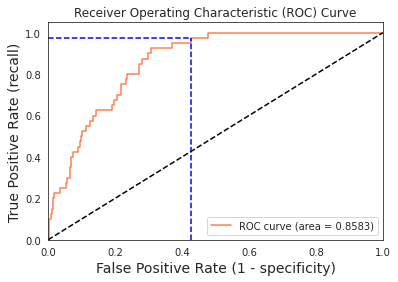



Using a threshold of 0.3323 guarantees a sensitivity of 0.9750 and a specificity of 0.5741, i.e. a false positive rate of 42.5926%.





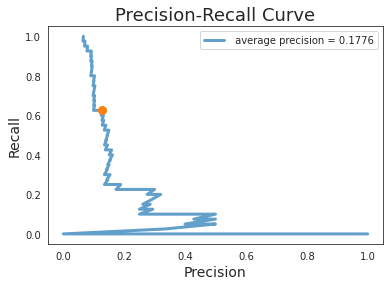

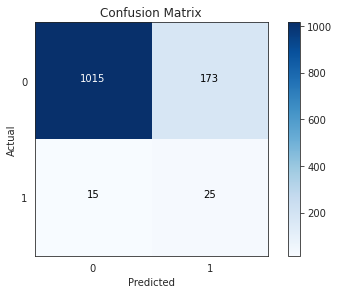




                                 OLS Regression Results                                
Dep. Variable:              Bankrupt?   R-squared (uncentered):                   0.454
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              7912.
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                        0.00
Time:                        15:16:24   Log-Likelihood:                         -7311.4
No. Observations:                9502   AIC:                                  1.462e+04
Df Residuals:                    9501   BIC:                                  1.463e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [26]:
select_feature = [' Net Income to Total Assets']
logreg = LogisticRegression()
model_results('Model 1: Junk Model',logreg=logreg,select_feature=select_feature,X_train=X_train_oversampled, y_train=y_train_oversampled, X_val=X_val, y_val=y_val,display_OLS='Y')

In [27]:
X_norm = pd.concat([X_train,y_train], axis=1)
print(X_norm.head())
X_norm_corr = pd.DataFrame(X_norm.corr()['Bankrupt?'].sort_values(ascending=False).reset_index()).rename(columns={'index': 'col', 'Bankrupt?': 'corr'})
print(X_norm_corr.loc[(X_norm_corr['corr']).abs()>.1])
select_feature =list(set(X_norm_corr.loc[(X_norm_corr['corr']).abs()>.1]['col'].values) - set(['Bankrupt?']))
print(select_feature)

       ROA(C) before interest and depreciation before interest  ...  Bankrupt?
2586                                                  0.547409  ...          0
712                                                   0.336275  ...          0
1659                                                  0.499001  ...          0
1743                                                  0.488324  ...          0
525                                                   0.410179  ...          1

[5 rows x 96 columns]
                                                         col      corr
0                                                  Bankrupt?  1.000000
1                                               Debt ratio %  0.256306
2                                       Borrowing dependency  0.207607
3                                Current Liability to Assets  0.203380
4                                        Liability to Equity  0.193240
5                              Equity to Long-term Liability  0.190400
6     

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
  cols = X.columns
  variables = np.arange(X.shape[1])
  dropped=True
  while dropped:
      dropped=False
      c = X[cols[variables]].values
      vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

      maxloc = vif.index(max(vif))
      if max(vif) > thresh:
          print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
          variables = np.delete(variables, maxloc)
          dropped=True

  print('Remaining variables:')
  print(X.columns[variables])
  return X[cols[variables]]

In [29]:
X_train2 = X_train[select_feature]
calculate_vif_(X_train2, thresh=100)

dropping ' Current Liability to Equity' at index: 8
dropping ' Operating Gross Margin' at index: 35
dropping ' Net worth/Assets' at index: 25
dropping ' Realized Sales Gross Margin' at index: 28
dropping ' Liability to Equity' at index: 0
dropping ' Net Value Per Share (A)' at index: 13
dropping ' Working Capital/Equity' at index: 5
dropping ' Net Value Per Share (C)' at index: 27
dropping ' Net Income to Total Assets' at index: 27
dropping ' ROA(B) before interest and depreciation after tax' at index: 19
dropping ' Borrowing dependency' at index: 13
dropping ' Operating profit/Paid-in capital' at index: 11
dropping ' Retained Earnings to Total Assets' at index: 8
dropping ' Inventory and accounts receivable/Net value' at index: 18
dropping ' Gross Profit to Sales' at index: 15
dropping ' Persistent EPS in the Last Four Seasons' at index: 0
dropping ' Net Income to Stockholder's Equity' at index: 0
dropping ' ROA(A) before interest and % after tax' at index: 14
dropping ' Net profit be

Current Liability to Current Assets  ...   Debt ratio %
2586                              0.006680  ...       0.013393
712                               0.034919  ...       0.106660
1659                              0.007090  ...       0.038909
1743                              0.028414  ...       0.109653
525                               0.077750  ...       0.211446
...                                    ...  ...            ...
2928                              0.039568  ...       0.118118
3191                              0.011702  ...       0.081114
1145                              0.038931  ...       0.204402
991                               0.018030  ...       0.050367
2969                              0.044944  ...       0.124014

[4909 rows x 13 columns]

In [30]:
select_feature =[' Cash/Total Assets', ' Equity to Long-term Liability',
       ' Current Liability to Assets', ' Tax rate (A)',
       ' Total expense/Assets', 
       ' Liability-Assets Flag', ' Net Value Per Share (B)', ' CFO to Assets',
       ' Cash/Current Liability', 
       ' Operating Profit Per Share (Yuan ¥)',
       ' Current Liability to Current Assets',' Net Income to Total Assets']
select_feature2=[' ROA(B) before interest and depreciation after tax', ' CFO to Assets',
       ' Cash Flow to Total Assets',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Current Liability to Current Assets',
       ' Equity to Long-term Liability', ' Debt ratio %',
       ' Working Capital to Total Assets', ' Cash/Current Liability']

(<Figure size 2736x2736 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb990e6e550>)

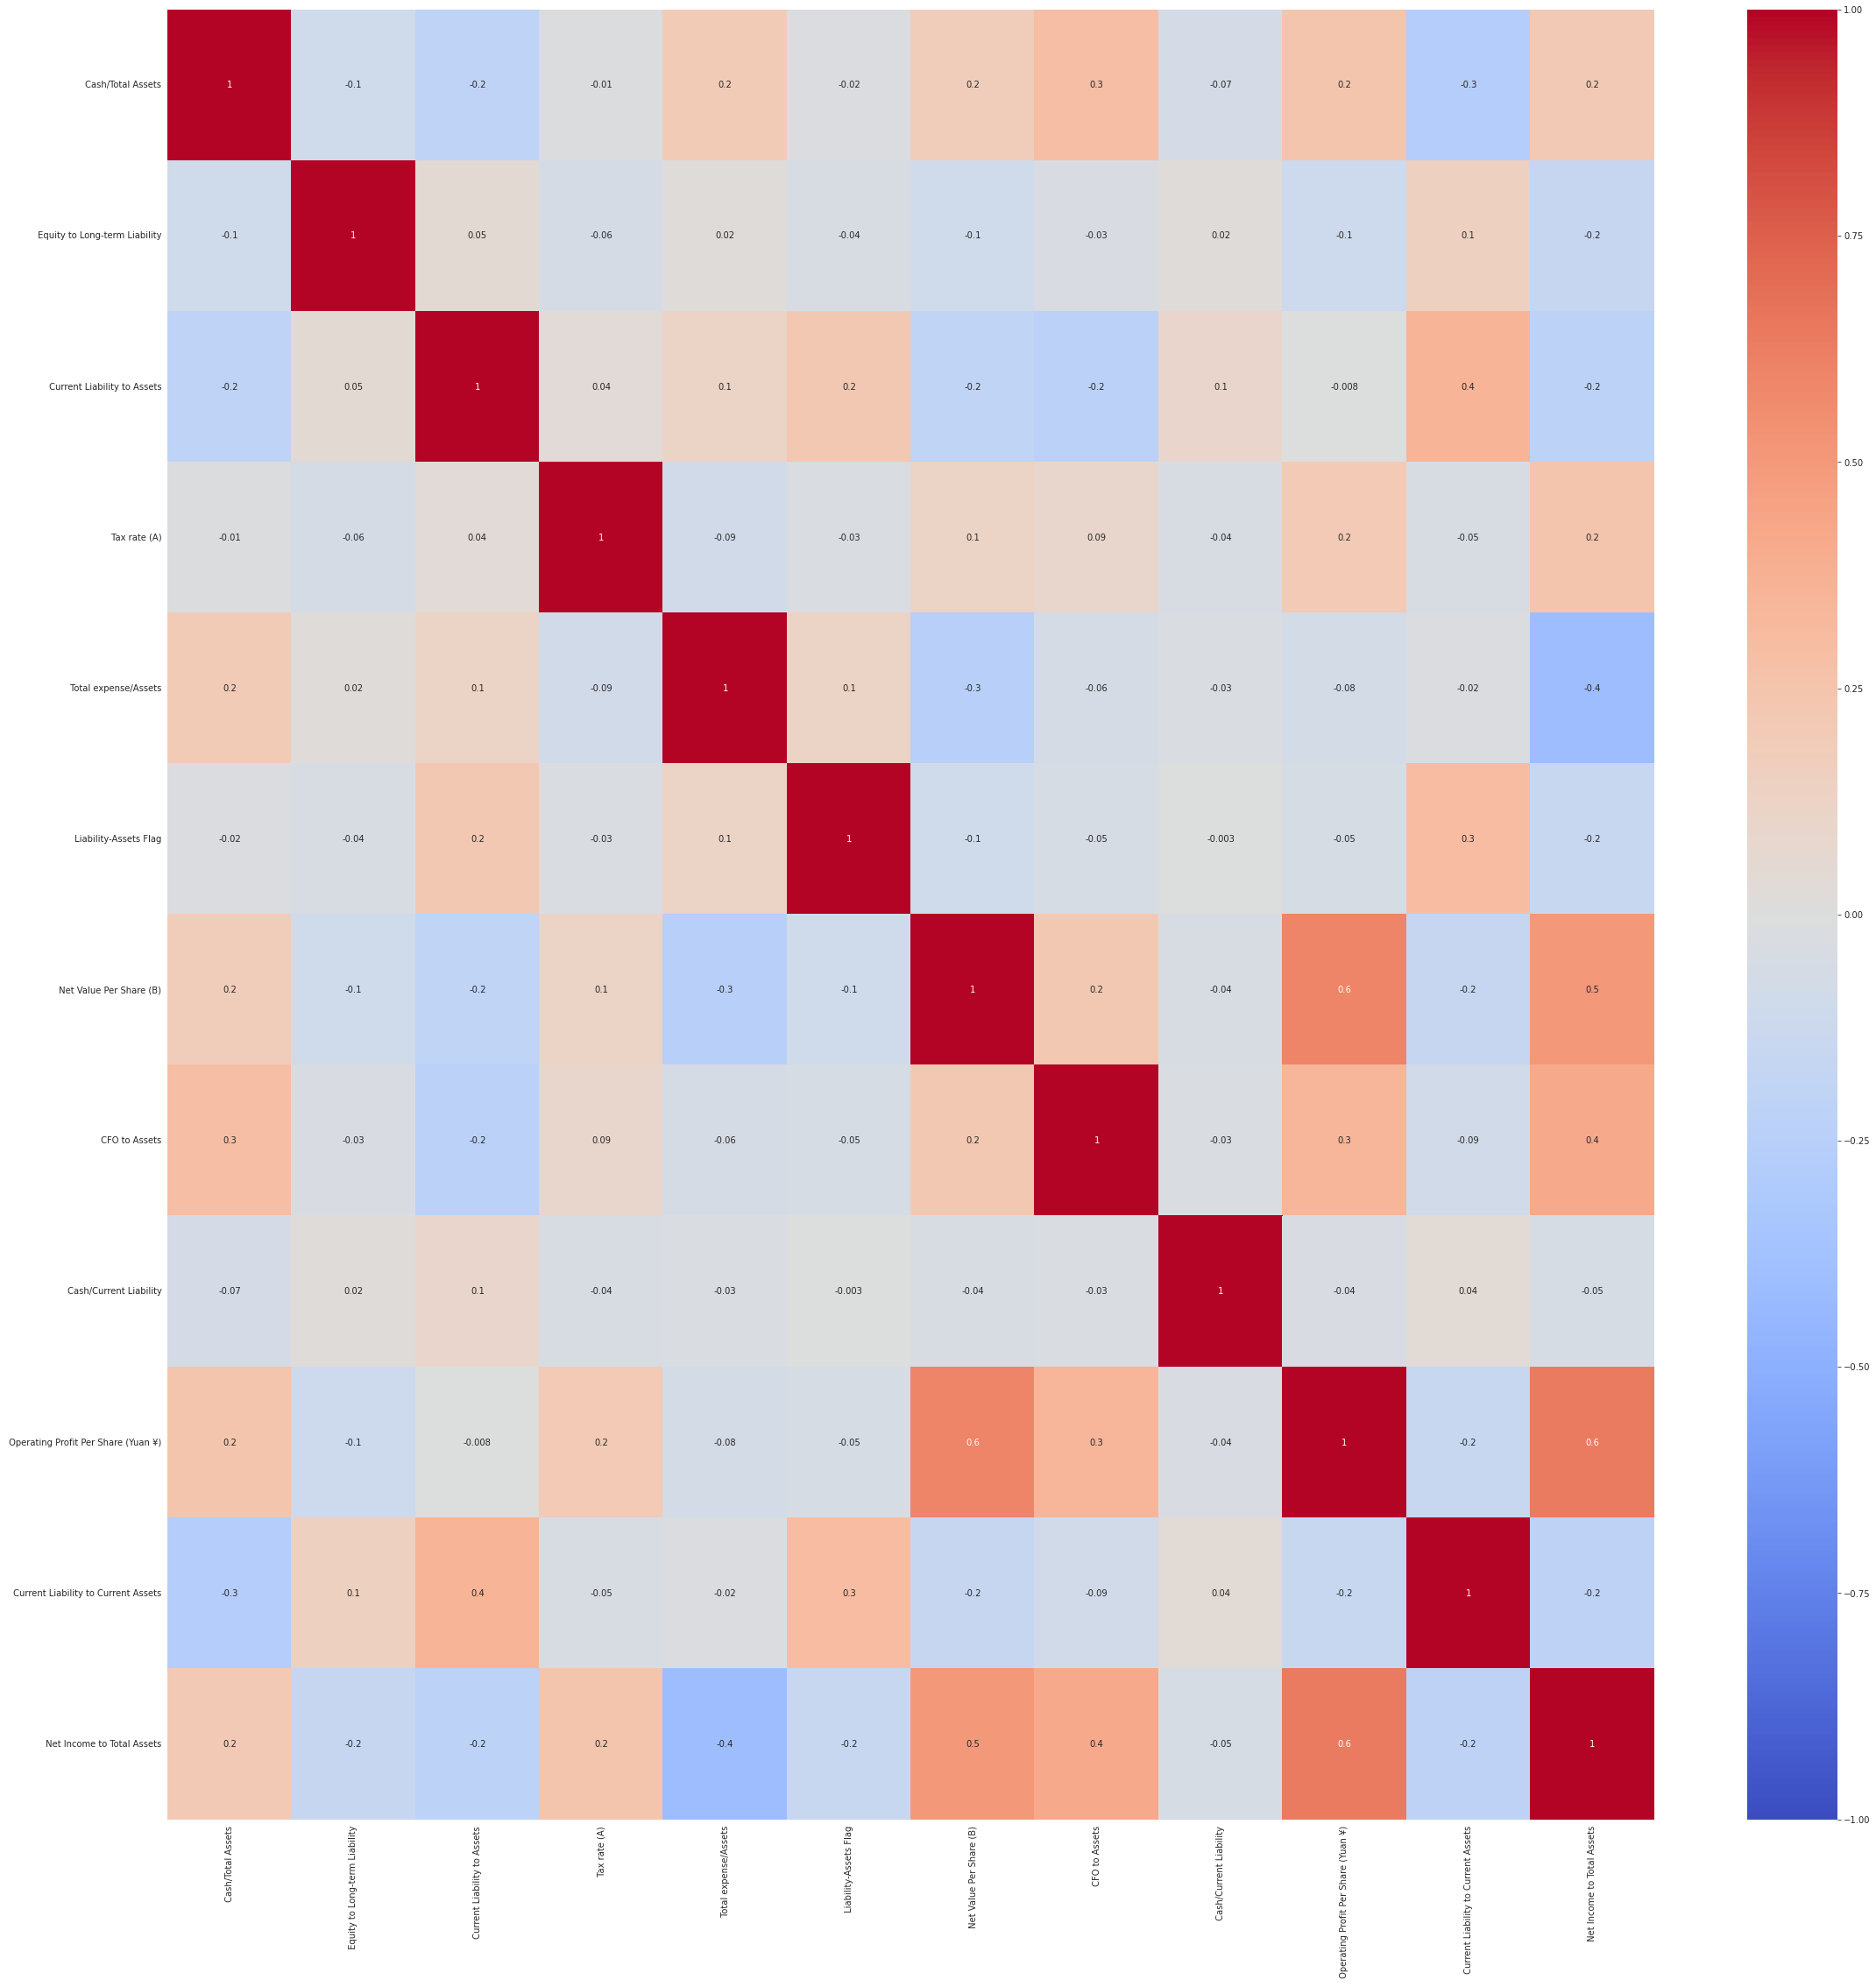

In [31]:
# check collinearity
plt.subplots(figsize=(38, 38))
sns.heatmap(X_norm[select_feature].corr(), annot =True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g')

######################### Model 2: Hand-picked Model #########################
Training Accuracy = 0.8949
Validation Accuracy = 0.8575

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.8660

Training f1_score : 1.000000
Validation f1_score : 0.285714
--------------- confusion_matrix ---------------
[[1018  170]
 [   5   35]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9951    0.8569    0.9209      1188
           1     0.1707    0.8750    0.2857        40

    accuracy                         0.8575      1228
   macro avg     0.5829    0.8660    0.6033      1228
weighted avg     0.9683    0.8575    0.9002      1228



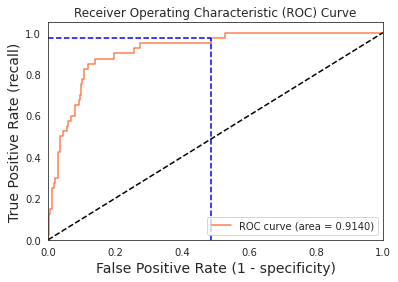



Using a threshold of 0.1407 guarantees a sensitivity of 0.9750 and a specificity of 0.5135, i.e. a false positive rate of 48.6532%.





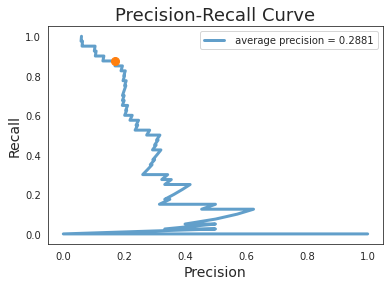

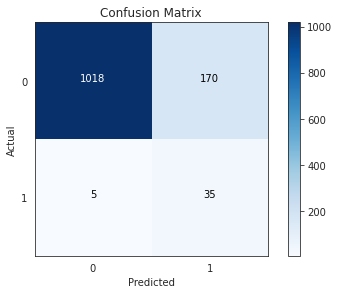




                                 OLS Regression Results                                
Dep. Variable:              Bankrupt?   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              3394.
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                        0.00
Time:                        15:16:38   Log-Likelihood:                         -3351.3
No. Observations:                9502   AIC:                                      6721.
Df Residuals:                    9493   BIC:                                      6785.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                                          coef    std err          t      P>|t|      [0.025      0.97

In [32]:
logreg = LogisticRegression()
model_results('Model 2: Hand-picked Model',logreg=logreg,select_feature=select_feature2,X_train=X_train_oversampled, y_train=y_train_oversampled, X_val=X_val, y_val=y_val,display_OLS='Y')

In [34]:
#parameters = {'C': np.linspace(1, 1000, 1000)}
parameters = {"penalty": ['l2','l1','elasticnet'],'C': np.linspace(1, 1000, 1000),}
logreg = LogisticRegression()
#clf = GridSearchCV(logreg, parameters, cv=5, verbose=5, n_jobs=3)
   
rand_logreg = RandomizedSearchCV(logreg, parameters, n_iter=4,scoring='f1')
rand_logreg.fit(X_train_oversampled[select_feature], y_train_oversampled)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rand_logreg.best_estimator_)
print("\n The best score across ALL searched params:\n", rand_logreg.best_score_)
print("\n The best parameters across ALL searched params:\n", rand_logreg.best_params_)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=4, n_jobs=None,
                   param_distributions={'C...
        955.,  956.,  957.,  958.,  959.,  960.,  961.,  962.,  963.,
        964.,  965.,  966.,  967.,  968.,  969.,  970.,  971.,  972.,
        973.,  974.,  975.,  976.,  977.,  978.,  979.,  980.,  981.,
        982.,  983.,  9

 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=839.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 The best score across ALL searched params:
 0.9045353037359039

 The best parameters across ALL searched params:
 {'penalty': 'l2', 'C': 839.0}


Figure 11: Logistic regression model

######################### Model 2: Hand-picked Model #########################
Training Accuracy = 0.9037
Validation Accuracy = 0.8770

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.8761

Training f1_score : 1.000000
Validation f1_score : 0.316742
--------------- confusion_matrix ---------------
[[1042  146]
 [   5   35]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9952    0.8771    0.9324      1188
           1     0.1934    0.8750    0.3167        40

    accuracy                         0.8770      1228
   macro avg     0.5943    0.8761    0.6246      1228
weighted avg     0.9691    0.8770    0.9124      1228



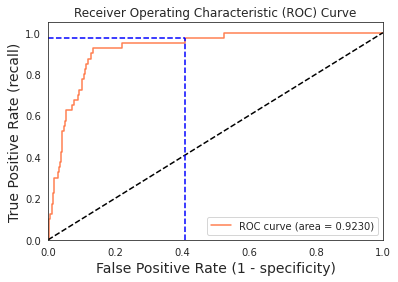



Using a threshold of 0.0891 guarantees a sensitivity of 0.9750 and a specificity of 0.5901, i.e. a false positive rate of 40.9933%.





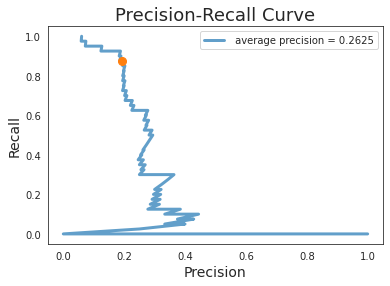

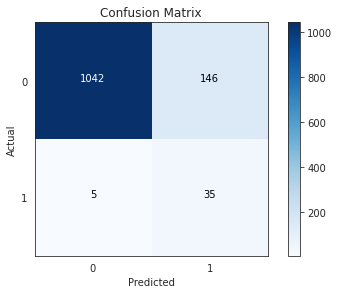




                                 OLS Regression Results                                
Dep. Variable:              Bankrupt?   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                              2092.
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                        0.00
Time:                        15:19:26   Log-Likelihood:                         -4044.6
No. Observations:                9502   AIC:                                      8113.
Df Residuals:                    9490   BIC:                                      8199.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
------------

In [36]:
logreg1 = LogisticRegression(C=503.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model_results('Model 2: Hand-picked Model',logreg=logreg1,select_feature=select_feature,X_train=X_train_oversampled, y_train=y_train_oversampled, X_val=X_val, y_val=y_val,display_OLS='Y')

In [37]:
gnb_sm = GaussianNB()
gnb_params = {'var_smoothing': np.logspace(0,-2, num=1000)}
    
rand_gnb = RandomizedSearchCV(gnb_sm, gnb_params, n_iter=4,scoring='f1')
rand_gnb.fit(X_train_oversampled[select_feature2], y_train_oversampled)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rand_gnb.best_estimator_)
print("\n The best score across ALL searched params:\n", rand_gnb.best_score_)
print("\n The best parameters across ALL searched params:\n", rand_gnb.best_params_)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   iid='deprecated', n_iter=4, n_jobs=None,
                   param_distributions={'var_smoothing': array([1.        , 0.99540083, 0.99082281, 0.98626585, 0.98172984,
       0.9772147 , 0.97272032, 0.96824661, 0.96379348, 0.95936083,
       0.95494856, 0.95055659, 0.94618482, 0.94183315, 0.9375015 ,
       0.93318977, 0.928...
       0.01116987, 0.0111185 , 0.01106736, 0.01101646, 0.01096579,
       0.01091536, 0.01086516, 0.01081519, 0.01076545, 0.01071593,
       0.01066665, 0.01061759, 0.01056876, 0.01052015, 0.01047177,
       0.01042361, 0.01037567, 0.01032795, 0.01028045, 0.01023317,
       0.0101861 , 0.01013925, 0.01009262, 0.0100462 , 0.01      ])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

 Results from Random Search 

 The best estimator across ALL searched params:
 GaussianNB(priors=None, var_smoothing=0.016758078645307678)

 The best score across ALL searched params:
 0.7815589351178921

 The best parameters across ALL searched params:
 {'var_smoothing': 0.016758078645307678}


Figure 12: Naïve Bayes model

######################### Model 3: GaussianNB Model #########################
Training Accuracy = 0.8033
Validation Accuracy = 0.9332

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.7481

Training f1_score : 1.000000
Validation f1_score : 0.349206
--------------- confusion_matrix ---------------
[[1124   64]
 [  18   22]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9842    0.9461    0.9648      1188
           1     0.2558    0.5500    0.3492        40

    accuracy                         0.9332      1228
   macro avg     0.6200    0.7481    0.6570      1228
weighted avg     0.9605    0.9332    0.9448      1228



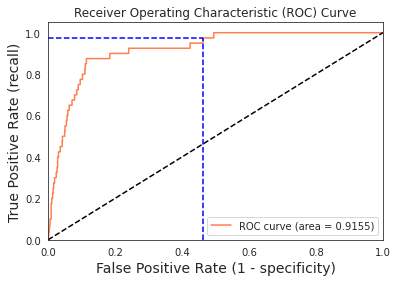



Using a threshold of 0.0219 guarantees a sensitivity of 0.9750 and a specificity of 0.5370, i.e. a false positive rate of 46.2963%.





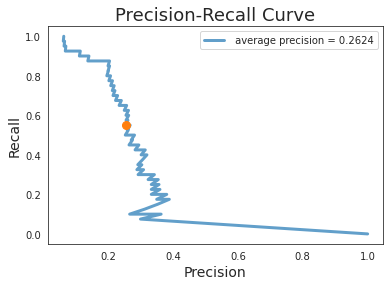

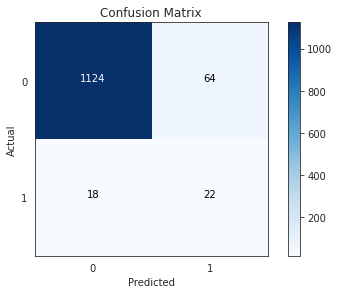

In [38]:
gaussian_nb =  GaussianNB(priors=None,var_smoothing=0.05817880074344935)
model_results('Model 3: GaussianNB Model',logreg=gaussian_nb,select_feature=select_feature2,X_train=X_train_oversampled, y_train=y_train_oversampled, X_val=X_val, y_val=y_val,display_OLS='N')

In [40]:
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid','linear']}
# Make grid search classifier
#clf_grid = GridSearchCV(svm.SVC(), param_grid,refit=True,verbose=2)
rand_svc = RandomizedSearchCV(svm.SVC(), param_grid, n_iter=4,scoring='f1')

rand_svc.fit(X_train_oversampled[select_feature], y_train_oversampled)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rand_svc.best_estimator_)
print("\n The best score across ALL searched params:\n", rand_svc.best_score_)
print("\n The best parameters across ALL searched params:\n", rand_svc.best_params_)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=4, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'sigmoid',
                                                   'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

 Results from Random Search 

 The best estimator across ALL searched params:
 SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 The best score across ALL searched params:
 0.9033689775438727

 The best parameters across ALL searched params:
 {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


Figure 13: SVM model

######################### Model 4: SVM Model #########################
Training Accuracy = 0.9060
Validation Accuracy = 0.8697

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.8360

Training f1_score : 1.000000
Validation f1_score : 0.285714
--------------- confusion_matrix ---------------
[[1036  152]
 [   8   32]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9923    0.8721    0.9283      1188
           1     0.1739    0.8000    0.2857        40

    accuracy                         0.8697      1228
   macro avg     0.5831    0.8360    0.6070      1228
weighted avg     0.9657    0.8697    0.9074      1228



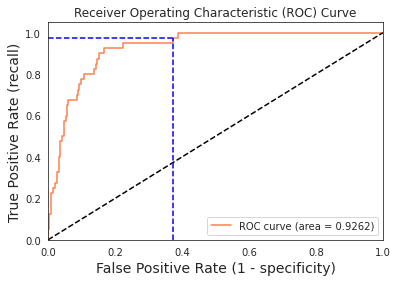



Using a threshold of 0.0832 guarantees a sensitivity of 0.9750 and a specificity of 0.6254, i.e. a false positive rate of 37.4579%.





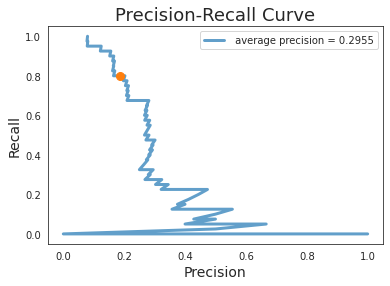

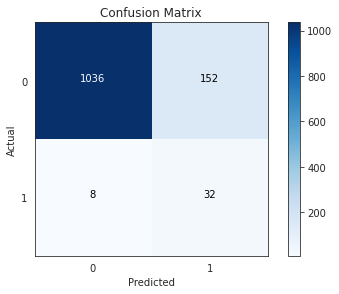

In [41]:
model_svm= svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

model_results('Model 4: SVM Model',logreg=model_svm,select_feature=select_feature,X_train=X_train_oversampled, y_train=y_train_oversampled, X_val=X_val, y_val=y_val,display_OLS='N')

PCA

In [85]:
# Standardizing the features
npca = .99
#X_trainPCA = StandardScaler().fit_transform(X_train_oversampled)
pca = PCA(n_components=npca)
pca_train = pca.fit_transform(X_train_oversampled)#
pca_trainDF = pd.DataFrame(data = pca_train)

#X_valPCA = StandardScaler().fit_transform(X_val)
pca_val = pca.transform(X_val)
pca_valDF = pd.DataFrame(data = pca_val)

pca.explained_variance_ratio_

array([0.23144593, 0.17057855, 0.11665279, 0.10132421, 0.09673275,
       0.07108871, 0.03807897, 0.03499814, 0.0310539 , 0.01861489,
       0.01609907, 0.01314788, 0.00950229, 0.00670183, 0.00592378,
       0.0052103 , 0.00472399, 0.00449041, 0.00383351, 0.00267553,
       0.00215841, 0.00161441, 0.00144902, 0.00114952, 0.00105797])

In [87]:
parameters = {"penalty": ['l2','l1','elasticnet'],'C': np.linspace(1, 1000, 1000),}
logregPCA = LogisticRegression().fit(pca_trainDF, y_train_oversampled)

rand_logregPCA = RandomizedSearchCV(logregPCA, parameters, n_iter=4,scoring='f1')
rand_logregPCA.fit(pca_trainDF, y_train_oversampled)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rand_logregPCA.best_estimator_)
print("\n The best score across ALL searched params:\n", rand_logregPCA.best_score_)
print("\n The best parameters across ALL searched params:\n", rand_logregPCA.best_params_)
print(pca.explained_variance_ratio_)

select_featurePCA=pca_trainDF.columns
print(select_featurePCA)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=4, n_jobs=None,
                   param_distributions={'C...
        955.,  956.,  957.,  958.,  959.,  960.,  961.,  962.,  963.,
        964.,  965.,  966.,  967.,  968.,  969.,  970.,  971.,  972.,
        973.,  974.,  975.,  976.,  977.,  978.,  979.,  980.,  981.,
        982.,  983.,  9

 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=944.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 The best score across ALL searched params:
 0.9081021946833239

 The best parameters across ALL searched params:
 {'penalty': 'l2', 'C': 944.0}
[0.23144593 0.17057855 0.11665279 0.10132421 0.09673275 0.07108871
 0.03807897 0.03499814 0.0310539  0.01861489 0.01609907 0.01314788
 0.00950229 0.00670183 0.00592378 0.0052103  0.00472399 0.00449041
 0.00383351 0.00267553 0.00215841 0.00161441 0.00144902 0.00114952
 0.00105797]
RangeIndex(start=0, stop=25, step=1)


######################### Model 2.1: Logistic PCA Model #########################
Training Accuracy = 0.9065
Validation Accuracy = 0.8754

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.8631

Training f1_score : 1.000000
Validation f1_score : 0.307692
--------------- confusion_matrix ---------------
[[1041  147]
 [   6   34]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9943    0.8763    0.9315      1188
           1     0.1878    0.8500    0.3077        40

    accuracy                         0.8754      1228
   macro avg     0.5911    0.8631    0.6196      1228
weighted avg     0.9680    0.8754    0.9112      1228



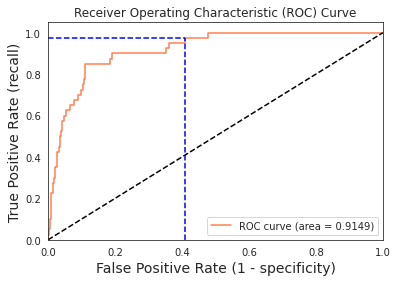



Using a threshold of 0.0612 guarantees a sensitivity of 0.9750 and a specificity of 0.5918, i.e. a false positive rate of 40.8249%.





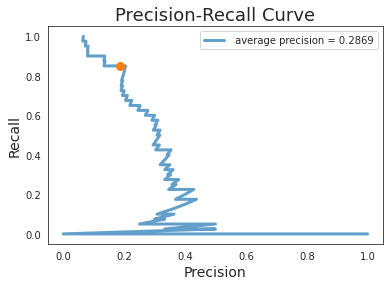

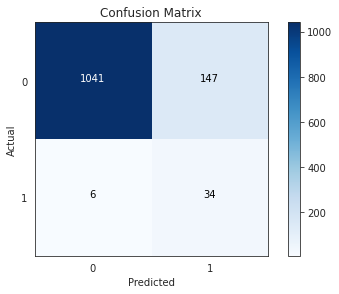




                                 OLS Regression Results                                
Dep. Variable:              Bankrupt?   R-squared (uncentered):                   0.289
Model:                            OLS   Adj. R-squared (uncentered):              0.287
Method:                 Least Squares   F-statistic:                              154.1
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:08:35   Log-Likelihood:                         -8568.9
No. Observations:                9502   AIC:                                  1.719e+04
Df Residuals:                    9477   BIC:                                  1.737e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [88]:
logregPCA1 = LogisticRegression(C=944.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model_results('Model 2.1: Logistic PCA Model',logreg=logregPCA1,select_feature=select_featurePCA,X_train=pca_trainDF, y_train=y_train_oversampled, X_val=pca_valDF, y_val=y_val,display_OLS='Y')

In [101]:
gnb_sm = GaussianNB()
gnb_params = {'var_smoothing': np.logspace(0,-2, num=1000)}
    
rand_gnbPCA = RandomizedSearchCV(gnb_sm, gnb_params, n_iter=10,scoring='f1')
rand_gnbPCA.fit(pca_trainDF, y_train_oversampled)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rand_gnbPCA.best_estimator_)
print("\n The best score across ALL searched params:\n", rand_gnbPCA.best_score_)
print("\n The best parameters across ALL searched params:\n", rand_gnbPCA.best_params_)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'var_smoothing': array([1.        , 0.99540083, 0.99082281, 0.98626585, 0.98172984,
       0.9772147 , 0.97272032, 0.96824661, 0.96379348, 0.95936083,
       0.95494856, 0.95055659, 0.94618482, 0.94183315, 0.9375015 ,
       0.93318977, 0.92...
       0.01116987, 0.0111185 , 0.01106736, 0.01101646, 0.01096579,
       0.01091536, 0.01086516, 0.01081519, 0.01076545, 0.01071593,
       0.01066665, 0.01061759, 0.01056876, 0.01052015, 0.01047177,
       0.01042361, 0.01037567, 0.01032795, 0.01028045, 0.01023317,
       0.0101861 , 0.01013925, 0.01009262, 0.0100462 , 0.01      ])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

 Results from Random Search 

 The best estimator across ALL searched params:
 GaussianNB(priors=None, var_smoothing=0.013369837418249465)

 The best score across ALL searched params:
 0.8279198848822548

 The best parameters across ALL searched params:
 {'var_smoothing': 0.013369837418249465}


######################### Model 3.1: GaussianNB Model #########################
Training Accuracy = 0.8077
Validation Accuracy = 0.6808

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.7384

Training f1_score : 1.000000
Validation f1_score : 0.140351
--------------- confusion_matrix ---------------
[[804 384]
 [  8  32]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9901    0.6768    0.8040      1188
           1     0.0769    0.8000    0.1404        40

    accuracy                         0.6808      1228
   macro avg     0.5335    0.7384    0.4722      1228
weighted avg     0.9604    0.6808    0.7824      1228



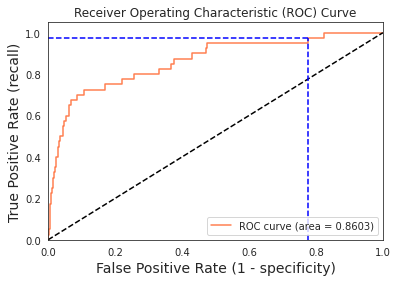



Using a threshold of 0.0538 guarantees a sensitivity of 0.9750 and a specificity of 0.2239, i.e. a false positive rate of 77.6094%.





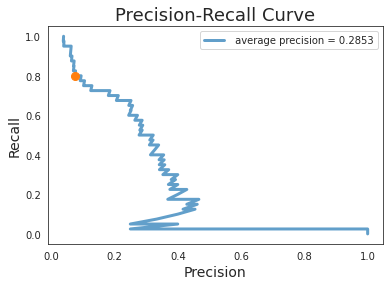

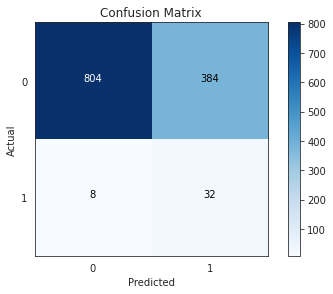

In [102]:
gaussian_nbPCA =  GaussianNB(priors=None, var_smoothing=0.013369837418249465)
model_results('Model 3.1: GaussianNB Model',logreg=gaussian_nbPCA,select_feature=select_featurePCA,X_train=pca_trainDF, y_train=y_train_oversampled, X_val=pca_valDF, y_val=y_val,display_OLS='N')

In [92]:
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid','linear']}
# Make grid search classifier
#clf_grid = GridSearchCV(svm.SVC(), param_grid,refit=True,verbose=2)
rand_svcPCA = RandomizedSearchCV(svm.SVC(), param_grid, n_iter=4,scoring='f1')

rand_svcPCA.fit(pca_trainDF, y_train_oversampled)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rand_svcPCA.best_estimator_)
print("\n The best score across ALL searched params:\n", rand_svcPCA.best_score_)
print("\n The best parameters across ALL searched params:\n", rand_svcPCA.best_params_)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=4, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'sigmoid',
                                                   'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

 Results from Random Search 

 The best estimator across ALL searched params:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 The best score across ALL searched params:
 0.9513103262183529

 The best parameters across ALL searched params:
 {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


######################### Model 4.1: SVM Model #########################
Training Accuracy = 0.9558
Validation Accuracy = 0.9153

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.8234

Training f1_score : 1.000000
Validation f1_score : 0.358025
--------------- confusion_matrix ---------------
[[1095   93]
 [  11   29]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9901    0.9217    0.9547      1188
           1     0.2377    0.7250    0.3580        40

    accuracy                         0.9153      1228
   macro avg     0.6139    0.8234    0.6563      1228
weighted avg     0.9655    0.9153    0.9352      1228



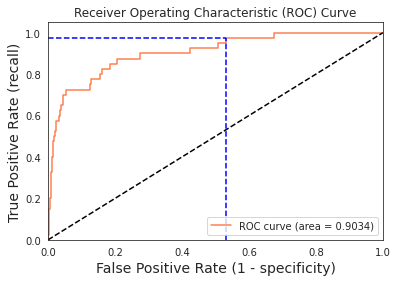



Using a threshold of 0.0019 guarantees a sensitivity of 0.9750 and a specificity of 0.4672, i.e. a false positive rate of 53.2828%.





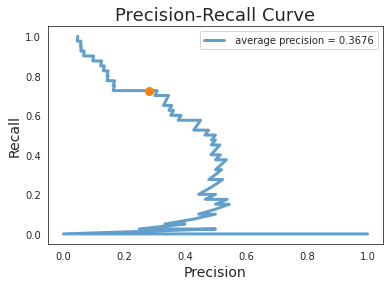

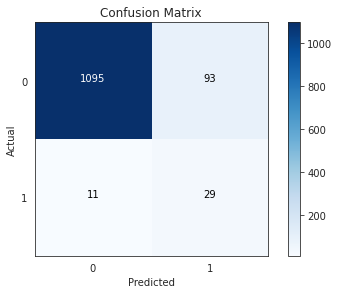

In [103]:
model_svmPCA= svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

model_results('Model 4.1: SVM Model',logreg=model_svmPCA,select_feature=select_featurePCA,X_train=pca_trainDF, y_train=y_train_oversampled, X_val=pca_valDF, y_val=y_val,display_OLS='N')

In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [10,20,40,80]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion=['entropy','gini']
class_weight= ['balanced','balanced_subsample']

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion':criterion,
              'class_weight' :class_weight}
print(param_grid)

model_rf = RandomForestClassifier()
rand_rf = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4,scoring='f1')
rand_rf.fit(X_train_oversampled, y_train_oversampled)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rand_rf.best_estimator_)
print("\n The best score across ALL searched params:\n", rand_rf.best_score_)
print("\n The best parameters across ALL searched params:\n", rand_rf.best_params_)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 40, 80], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False], 'criterion': ['entropy', 'gini'], 'class_weight': ['balanced', 'balanced_subsample']}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  4.1min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9857641585800634

 The best parameters across ALL searched params:
 {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}


Figure 14: Random Forest Classifier

######################### Model 5: RandomForestClassifier Model #########################
Training Accuracy = 1.0000
Validation Accuracy = 0.9568

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.7482

Training f1_score : 1.000000
Validation f1_score : 0.442105
--------------- confusion_matrix ---------------
[[1154   34]
 [  19   21]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9838    0.9714    0.9776      1188
           1     0.3818    0.5250    0.4421        40

    accuracy                         0.9568      1228
   macro avg     0.6828    0.7482    0.7098      1228
weighted avg     0.9642    0.9568    0.9601      1228



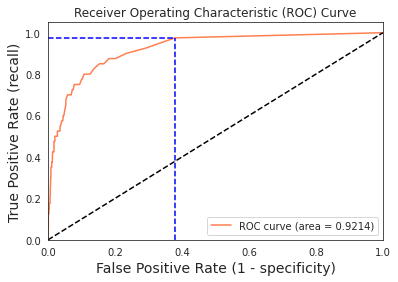



Using a threshold of 0.0156 guarantees a sensitivity of 0.9750 and a specificity of 0.6212, i.e. a false positive rate of 37.8788%.





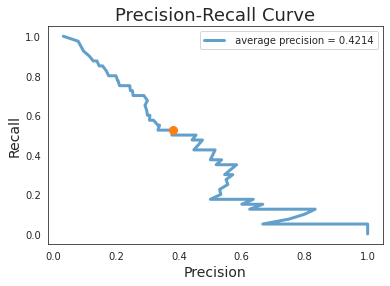

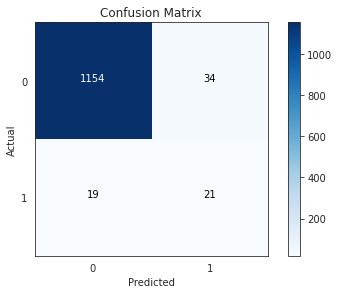

In [44]:
select_feature3 = X_train.columns
model_rf= RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model_results('Model 5: RandomForestClassifier Model',logreg=model_rf,select_feature=select_feature3,X_train=X_train_oversampled, y_train=y_train_oversampled, X_val=X_val, y_val=y_val,display_OLS='N')

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x7fb985784490>,
 [Text(0, 0, " Net Income to Stockholder's Equity"),
  Text(0, 0, ' Total debt/Total net worth'),
  Text(0, 0, ' Per Share Net profit before tax (Yuan ¥)'),
  Text(0, 0, ' After-tax net Interest Rate'),
  Text(0, 0, ' Net Income to Total Assets'),
  Text(0, 0, ' Persistent EPS in the Last Four Seasons'),
  Text(0, 0, ' Net profit before tax/Paid-in capital'),
  Text(0, 0, ' Continuous interest rate (after tax)'),
  Text(0, 0, ' Retained Earnings to Total Assets'),
  Text(0, 0, ' Borrowing dependency')])

Text(0.5, 0, 'Relative Importance')

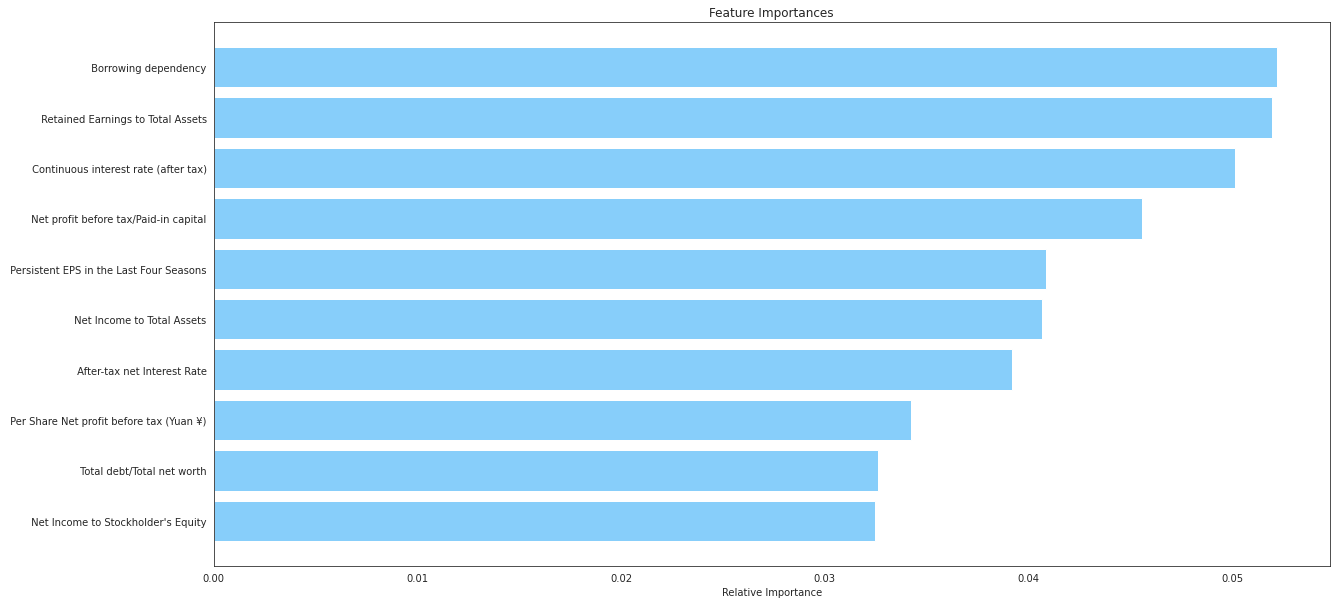

In [123]:
features = X_train.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10

plt.figure(figsize=(20,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='lightskyblue', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [104]:
model_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

rand_xgb = RandomizedSearchCV(model_xgb, 
                         param_distributions = param_dist,
                         cv =10,  
                         n_iter = 5, 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1,scoring='f1')

rand_xgb.fit(X_train_oversampled, y_train_oversampled)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rand_xgb.best_estimator_)
print("\n The best score across ALL searched params:\n", rand_xgb.best_score_)
print("\n The best parameters across ALL searched params:\n", rand_xgb.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.1min finished


RandomizedSearchCV(cv=10, error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sca...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb98a0db590>,
                                        'max_dep

 Results from Random Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8796922826172242, gamma=0,
              learning_rate=0.21044046988031048, max_delta_step=0, max_depth=7,
              min_child_weight=4, missing=None, n_estimators=643, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6424182378732652, verbosity=1)

 The best score across ALL searched params:
 0.9884446985586639

 The best parameters across ALL searched params:
 {'colsample_bytree': 0.8796922826172242, 'learning_rate': 0.21044046988031048, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 643, 'subsample': 0.6424182378732652}


Figure 15: Gradient Boosted Trees

######################### Model 6: XGBClassifier Model #########################
Training Accuracy = 1.0000
Validation Accuracy = 0.9552

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.7353

Training f1_score : 1.000000
Validation f1_score : 0.421053
--------------- confusion_matrix ---------------
[[1153   35]
 [  20   20]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9829    0.9705    0.9767      1188
           1     0.3636    0.5000    0.4211        40

    accuracy                         0.9552      1228
   macro avg     0.6733    0.7353    0.6989      1228
weighted avg     0.9628    0.9552    0.9586      1228



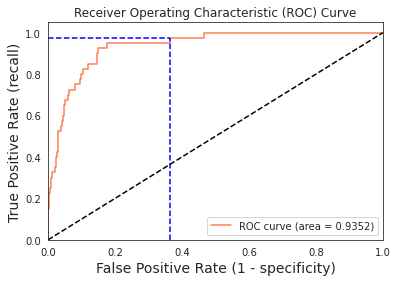



Using a threshold of 0.0001 guarantees a sensitivity of 0.9750 and a specificity of 0.6355, i.e. a false positive rate of 36.4478%.





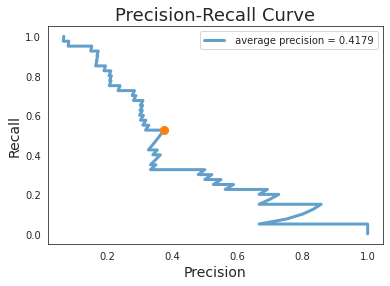

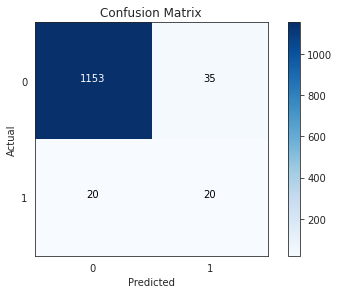

In [105]:
model_xgb= xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8796922826172242, gamma=0,
              learning_rate=0.21044046988031048, max_delta_step=0, max_depth=7,
              min_child_weight=4, missing=None, n_estimators=643, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6424182378732652, verbosity=1)

model_results('Model 6: XGBClassifier Model',logreg=model_xgb,select_feature=select_feature3,X_train=X_train_oversampled, y_train=y_train_oversampled, X_val=X_val, y_val=y_val,display_OLS='N')

In [118]:
param_dist = {'max_features' : ['sqrt','log2',0.5,0.6,0.7,0.8,0.9,1.0],  
              'min_samples_leaf' : [1, 2, 3, 7, 10, 11, 100],  
              'max_depth': [10,11,12,13,14],
              'n_estimators': [50, 100,500],  
              'oob_score': [True, False]}  

#rand_extratress = RandomizedSearchCV(ExtraTreesRegressor(warm_start=True,bootstrap=True,random_state=7),  param_distributions = param_dist,  cv=3,  n_iter = 15,random_state=7)  
rand_extratress=RandomizedSearchCV(ExtraTreesClassifier(), param_dist, cv=10, scoring='f1')
rand_extratress.fit(X_train_oversampled, y_train_oversampled)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rand_extratress.best_estimator_)
print("\n The best score across ALL searched params:\n", rand_extratress.best_score_)
print("\n The best parameters across ALL searched params:\n", rand_extratress.best_params_)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                       

 Results from Random Search 

 The best estimator across ALL searched params:
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=11, max_features=0.7,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=11, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

 The best score across ALL searched params:
 0.9638799259051269

 The best parameters across ALL searched params:
 {'oob_score': False, 'n_estimators': 500, 'min_samples_leaf': 11, 'max_features': 0.7, 'max_depth': 11}


Figure 16: Extra Trees

######################### Model 7: ExtraTreesRegressor Model #########################
Training Accuracy = 0.9764
Validation Accuracy = 0.9243

Training ROC_AUC_score : 1.0000
Validation ROC_AUC_score : 0.8280

Training f1_score : 1.000000
Validation f1_score : 0.384106
--------------- confusion_matrix ---------------
[[1106   82]
 [  11   29]]



--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0     0.9902    0.9310    0.9597      1188
           1     0.2613    0.7250    0.3841        40

    accuracy                         0.9243      1228
   macro avg     0.6257    0.8280    0.6719      1228
weighted avg     0.9664    0.9243    0.9409      1228



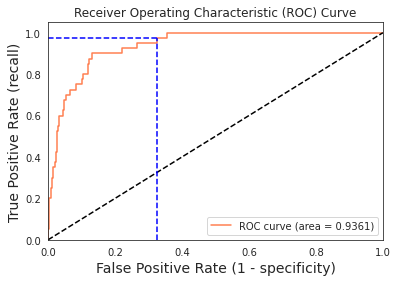



Using a threshold of 0.0485 guarantees a sensitivity of 0.9750 and a specificity of 0.6742, i.e. a false positive rate of 32.5758%.





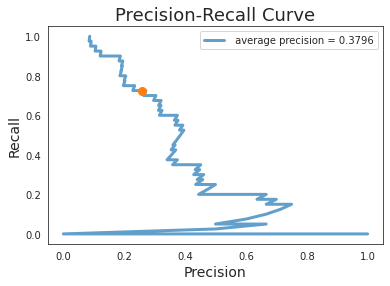

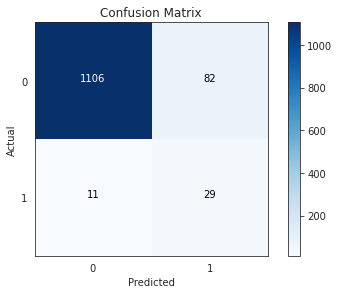

In [122]:
model_extraTrees=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=11, max_features=0.7,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=11, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

model_results('Model 7: ExtraTreesRegressor Model',logreg=model_extraTrees,select_feature=select_feature3,X_train=X_train_oversampled, y_train=y_train_oversampled, X_val=X_val, y_val=y_val,display_OLS='N')